# CS 315 Project #1: Data Visualization (*Group 2*)

**Section 01 - Group 2 Data Visualization Code**

**Written**: Wednesday, February 14, 2024

<a id="sec1"></a>
# 1. Loading in our data

We will load into pandas our data for all data collection runs. Our raw data has been previously cleaned and concatenated together.

Our dataset has the following columns:
- **batchID**: *string* concatenation of "user, "run", "batch", "index"
- **run**: *int* representing 1-5 runs that webdriver preformed
- **batch**: *int* representing batch 1-5 for each individual run
- **index**: *int* representing index value of video per batch
- **saved**: *boolean* True if video was saved, False otherwise
- **author**: *string* representation of video's creator
- **likes**: *int* number of likes
- **comments**: *int* number of comments
- **shares**: *int* number of shares
- **saves**: *int* number of saves
- **music**: *string* representation of sound used in video
- **hashtags**: *list* of hashtags used in video


***NOTE: Change/Update file paths!***

In [1]:
# import all libraries we will need in order to run this notebook
import os, csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import urllib

/var/folders/nd/my_j6y6s0p544s5nzvtvnntm0000gn/T/ipykernel_5124/3799045707.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


##### Using os we are finding the file path for our data and loading it into a new pandas dataframe.

In [2]:
# Loading in our data
cwd = os.getcwd()
df = pd.read_csv(f'{cwd}/../data/master.csv')
df

batchID  run  batch  index  saved               author  \
0       fn_activ_1_1_0    1      1      0  False        ina.katherine   
1       fn_activ_1_1_1    1      1      1  False             leci.bby   
2       fn_activ_1_1_2    1      1      2  False        kassieemariee   
3       fn_activ_1_1_3    1      1      3  False        caseynicolaxx   
4       fn_activ_1_1_4    1      1      4  False         jailyneojeda   
...                ...  ...    ...    ...    ...                  ...   
8460  ep_cntrl_24_5_19   24      5     19  False      quedivertidotv1   
8461  ep_cntrl_24_5_20   24      5     20  False  familiapinaoficiial   
8462  ep_cntrl_24_5_21   24      5     21  False           itssanya.1   
8463  ep_cntrl_24_5_22   24      5     22  False        nayelilovera_   
8464  ep_cntrl_24_5_23   24      5     23  False      ellianawalmsley   

        likes  comments  shares  saves  \
0     3400000     30200  226400  94800   
1      280200       627   15500    164   
2      689400      2198   73600   6060   
3       29500       107     855     62   
4      439800      1313   30800    965   
...       ...       ...     ...    ...   
8460     7912        21     362     10   
8461   228200      1110   14700    774   
8462   124100       576   10700    109   
8463    46300       662    6843     94   
8464   138700       959    6569    158   

                                              music  \
0                              original sound - ina   
1                      original sound - fr0sty_rick   
2                        original sound - Taj.Mahal   
3     Rock With It by Saucy Santana - Saucy Santana   
4                    original sound - Jailyne Ojeda   
...                                             ...   
8460             sonido original - Qué Divertido Tv   
8461            som original - Família.Pina.Oficial   
8462                         original sound - Sanya   
8463                                Love songs - ⭐️   
8464                     Fuck It Up! - Ocho Drippin   

                                               hashtags  
0                                                   NaN  
1     ['fyp%E3%82%B7', 'relatable', 'trending', 'ayl...  
2                                                   NaN  
3     ['fyp', 'foryou', 'foryoupage', 'caseynicola',...  
4                                                   NaN  
...                                                 ...  
8460                                                NaN  
8461                                                NaN  
8462                              ['@ucoolmediylashes']  
8463  ['fyp%E3%82%B7', 'trending', 'fyp', 'foryoupag...  
8464  ['babygerald', 'babymamas', 'wearentactuallypr...  

[8465 rows x 12 columns]

<a id="sec2"></a>
# 2. Analyzing our data

## **plot_metric_member**

Creates data frames for one person's control and active account and plots the median for each run.

Each plot is saved in folder named "*visualizations*".

##### **Parameters**:
- **Metric**: *str*, represents one of the following metrics of TikTok's popularity: likes, comments, shares, saves (only acceptable inputs)
- **Initial**: *str*, should represent one of six group members: ep, dl, lg, fg, fn, ss (only acceptable inputs)

In [3]:
df["group"] = ["active" if "activ" in row else 'control' for row in df['batchID']]
df

batchID  run  batch  index  saved               author  \
0       fn_activ_1_1_0    1      1      0  False        ina.katherine   
1       fn_activ_1_1_1    1      1      1  False             leci.bby   
2       fn_activ_1_1_2    1      1      2  False        kassieemariee   
3       fn_activ_1_1_3    1      1      3  False        caseynicolaxx   
4       fn_activ_1_1_4    1      1      4  False         jailyneojeda   
...                ...  ...    ...    ...    ...                  ...   
8460  ep_cntrl_24_5_19   24      5     19  False      quedivertidotv1   
8461  ep_cntrl_24_5_20   24      5     20  False  familiapinaoficiial   
8462  ep_cntrl_24_5_21   24      5     21  False           itssanya.1   
8463  ep_cntrl_24_5_22   24      5     22  False        nayelilovera_   
8464  ep_cntrl_24_5_23   24      5     23  False      ellianawalmsley   

        likes  comments  shares  saves  \
0     3400000     30200  226400  94800   
1      280200       627   15500    164   
2      689400      2198   73600   6060   
3       29500       107     855     62   
4      439800      1313   30800    965   
...       ...       ...     ...    ...   
8460     7912        21     362     10   
8461   228200      1110   14700    774   
8462   124100       576   10700    109   
8463    46300       662    6843     94   
8464   138700       959    6569    158   

                                              music  \
0                              original sound - ina   
1                      original sound - fr0sty_rick   
2                        original sound - Taj.Mahal   
3     Rock With It by Saucy Santana - Saucy Santana   
4                    original sound - Jailyne Ojeda   
...                                             ...   
8460             sonido original - Qué Divertido Tv   
8461            som original - Família.Pina.Oficial   
8462                         original sound - Sanya   
8463                                Love songs - ⭐️   
8464                     Fuck It Up! - Ocho Drippin   

                                               hashtags    group  
0                                                   NaN   active  
1     ['fyp%E3%82%B7', 'relatable', 'trending', 'ayl...   active  
2                                                   NaN   active  
3     ['fyp', 'foryou', 'foryoupage', 'caseynicola',...   active  
4                                                   NaN   active  
...                                                 ...      ...  
8460                                                NaN  control  
8461                                                NaN  control  
8462                              ['@ucoolmediylashes']  control  
8463  ['fyp%E3%82%B7', 'trending', 'fyp', 'foryoupag...  control  
8464  ['babygerald', 'babymamas', 'wearentactuallypr...  control  

[8465 rows x 13 columns]

In [4]:
# For each team member, create a separate dataframe containing their active data
ep_activ = df[df['batchID'].str.contains('ep_activ')]
ss_activ = df[df['batchID'].str.contains('ss_activ')]
fg_activ = df[df['batchID'].str.contains('fg_activ')]
fn_activ = df[df['batchID'].str.contains('fn_activ')]
lg_activ = df[df['batchID'].str.contains('lg_activ')]
dl_activ = df[df['batchID'].str.contains('Dl_activ')]

In [5]:
# For each team member, create a separate dataframe containing their control data
ep_cntrl = df[df['batchID'].str.contains('ep_cntrl')]
ss_cntrl = df[df['batchID'].str.contains('ss_cntrl')]
fg_cntrl = df[df['batchID'].str.contains('fg_cntrl')]
fn_cntrl = df[df['batchID'].str.contains('fn_cntrl')]
lg_cntrl = df[df['batchID'].str.contains('lg_cntrl')]
dl_cntrl = df[df['batchID'].str.contains('Dl_cntrl')]

##### We will concatenate each users two datasets to form one dataframe per memeber.

In [6]:
ep = pd.concat([ep_cntrl,ep_activ])
ss = pd.concat([ss_cntrl,ss_activ])
fg = pd.concat([fg_cntrl,fg_activ])
fn = pd.concat([fn_cntrl,fn_activ])
lg = pd.concat([lg_cntrl,lg_activ])
dl = pd.concat([dl_cntrl,dl_activ])

In [7]:
def plot_metric_member(metric, initial, df):
    '''
    Creates data frames for one person's control and active account and plots the mean for each run.

    Parameters:
        Metric: str, represents one of the following metrics of TikTok's popularity: likes, comments, shares, saves (only acceptable inputs)
        Initial: str, should represent one of six group members: ep, dl, lg, fg, fn, ss (only acceptable inputs)
    '''
    sns.set_theme(style="whitegrid")
    fig = sns.lineplot(x="run", 
                       y= metric,
                       data=df, 
                       hue="group",
                       marker='o',
                       errorbar=None)

    plt.title(f'Median {metric} for {initial} for Active and Control Groups')
    plt.xlabel('Run Number')
    plt.legend(loc='upper left',title="Legend")

    plt.savefig(f'{cwd}/vizualizations/{initial}_{metric}.png', bbox_inches='tight')
    plt.show()

##### Now we will run **plot_metric_member** once for each member (ep, dl, lg, fg, fn, ss).

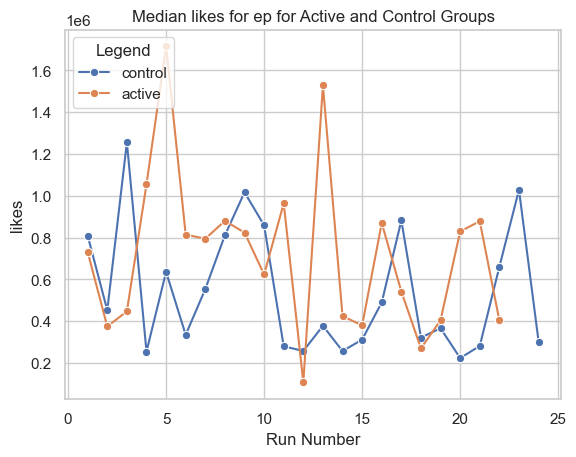

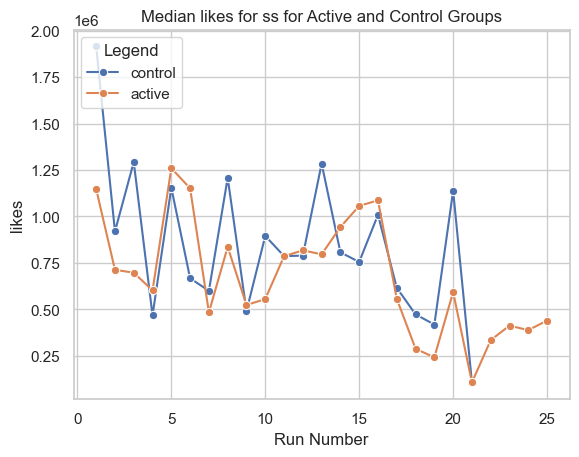

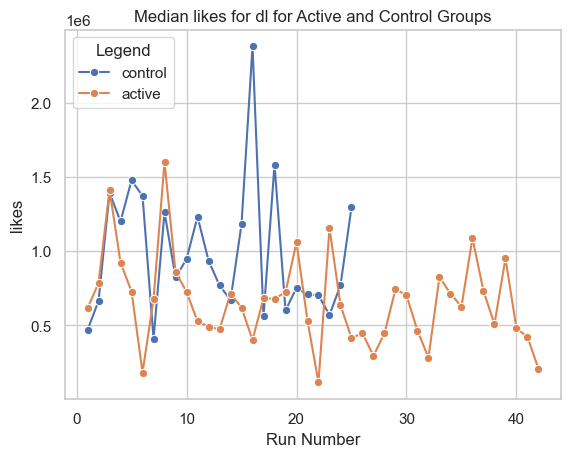

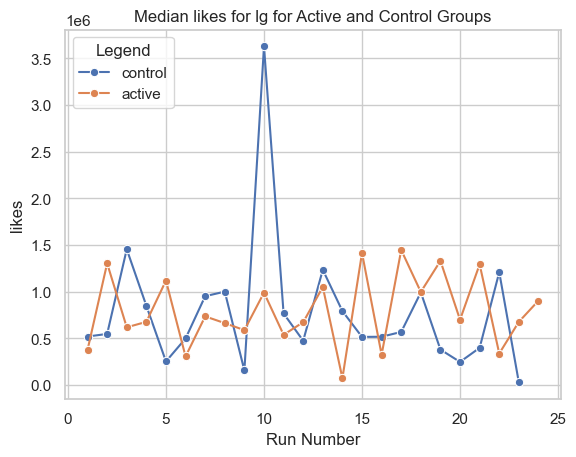

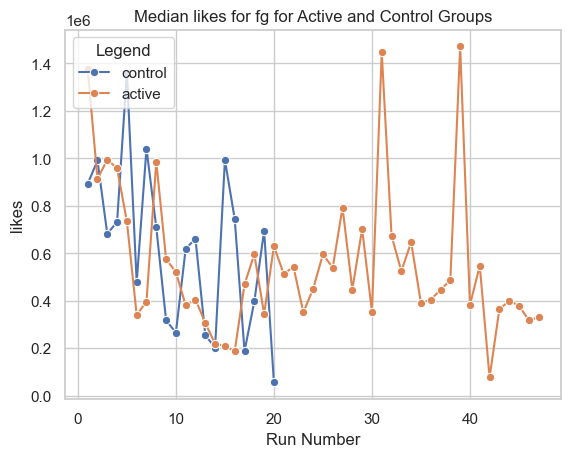

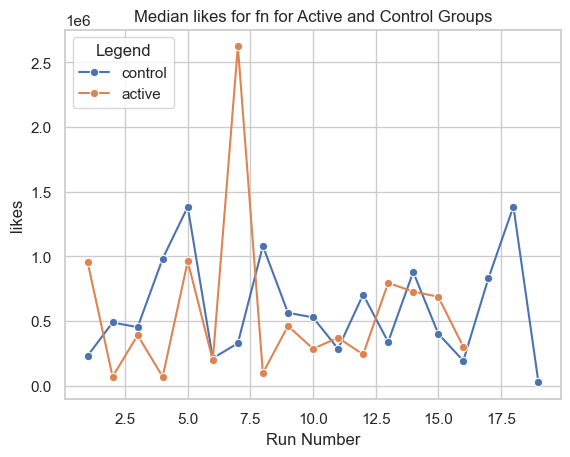

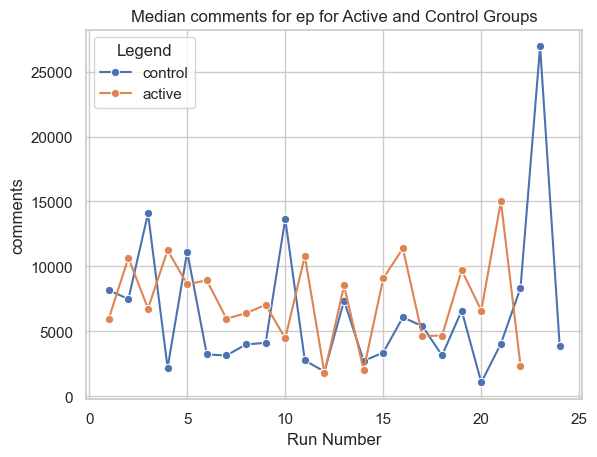

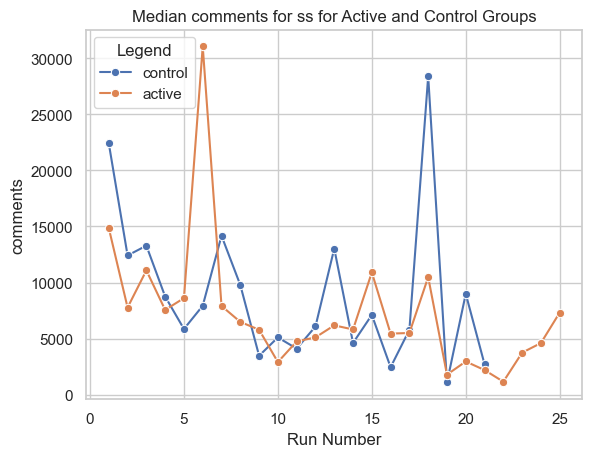

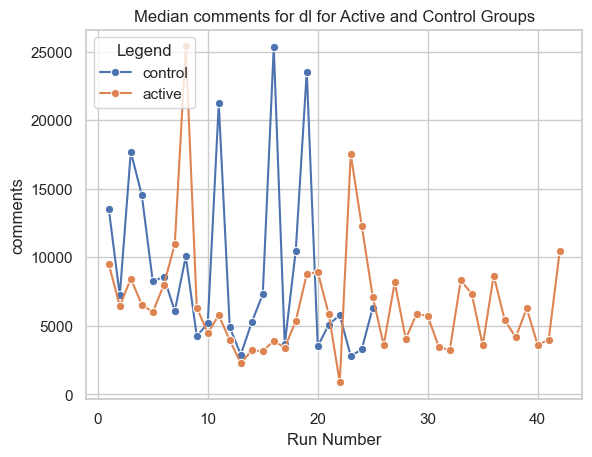

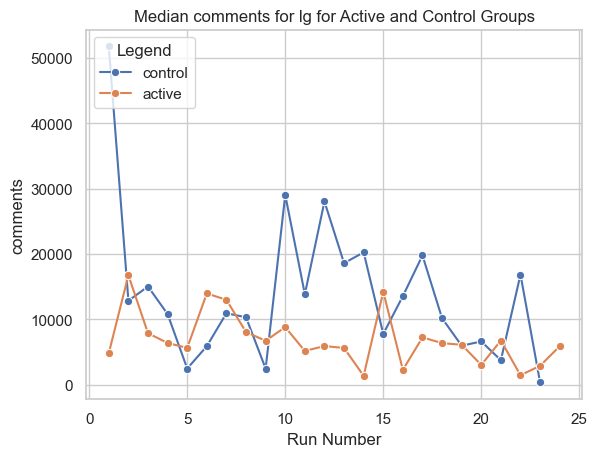

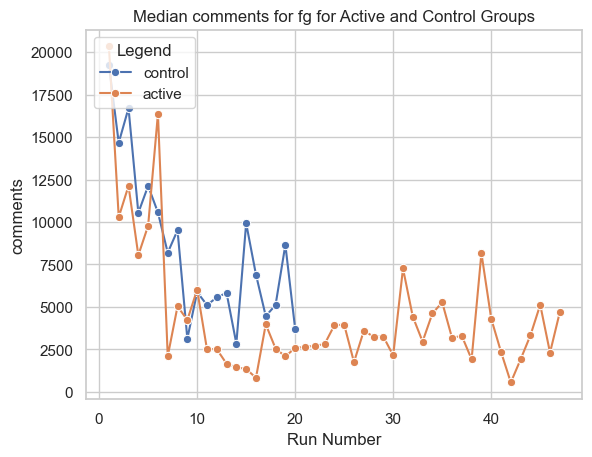

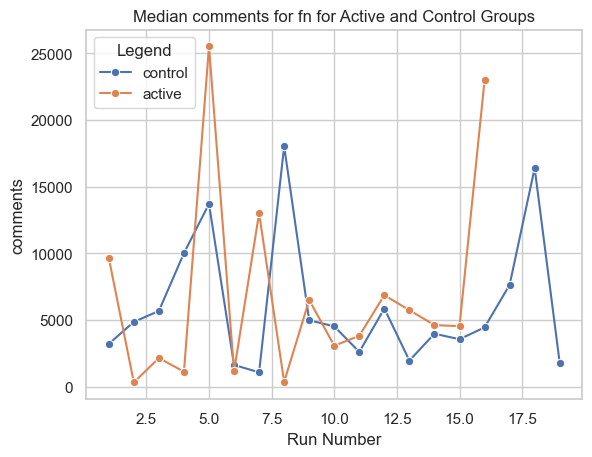

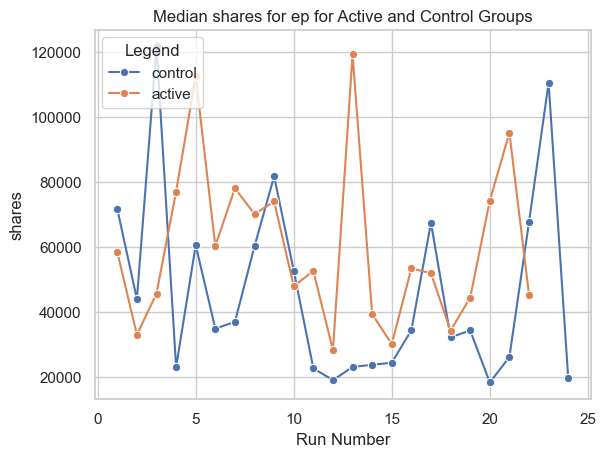

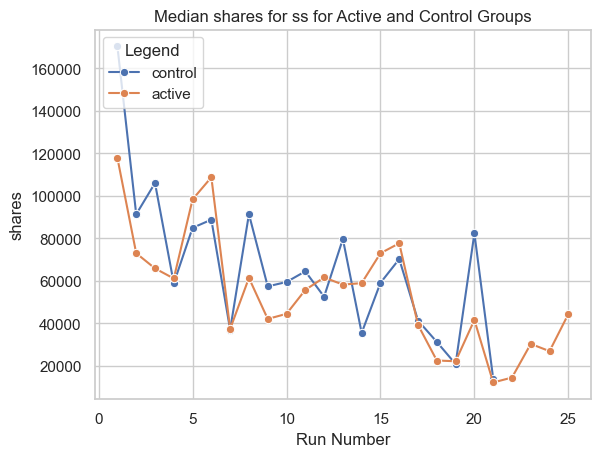

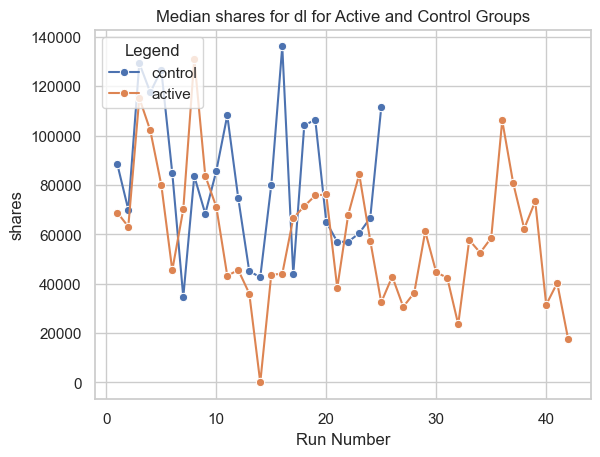

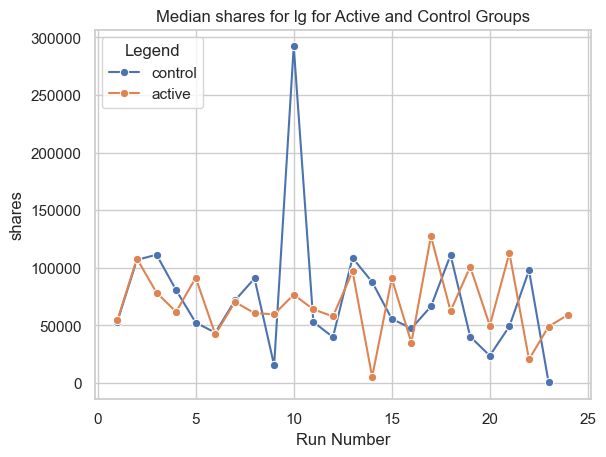

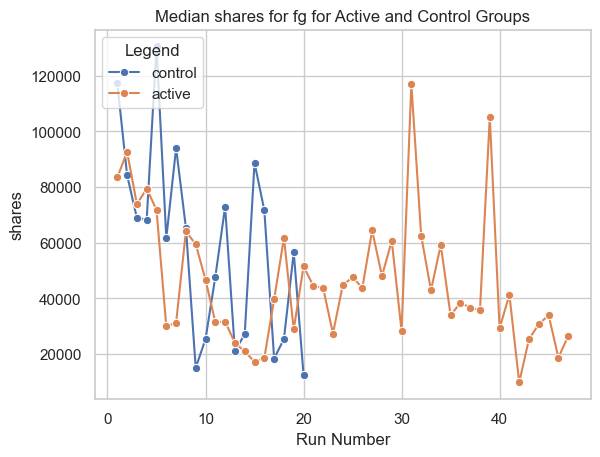

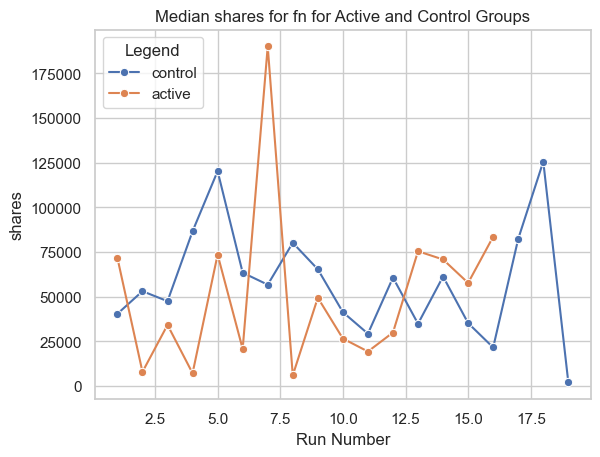

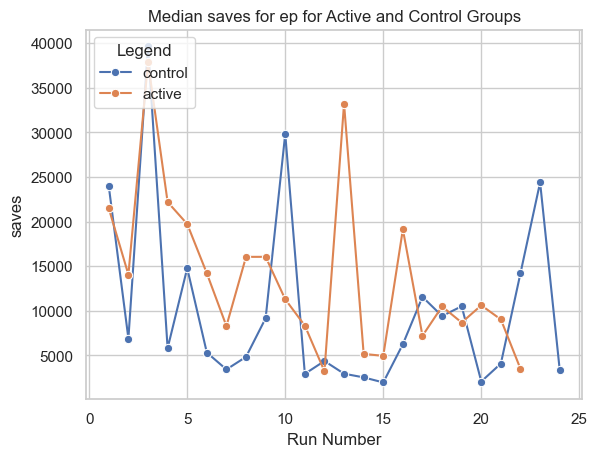

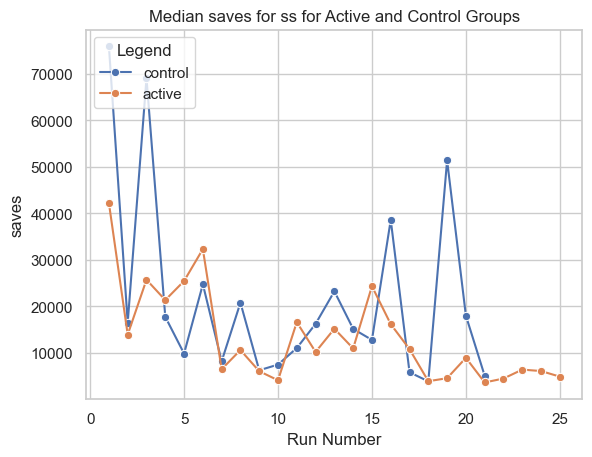

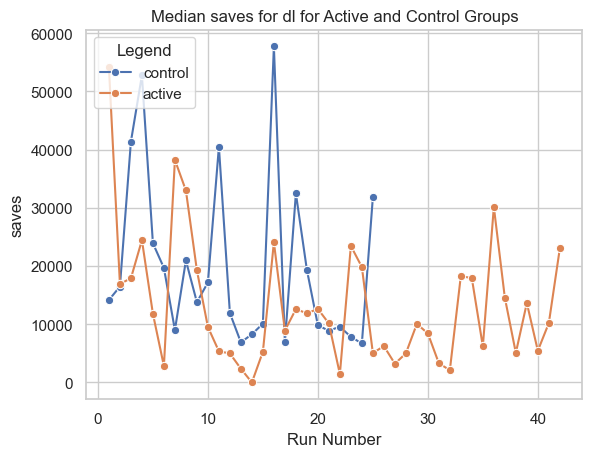

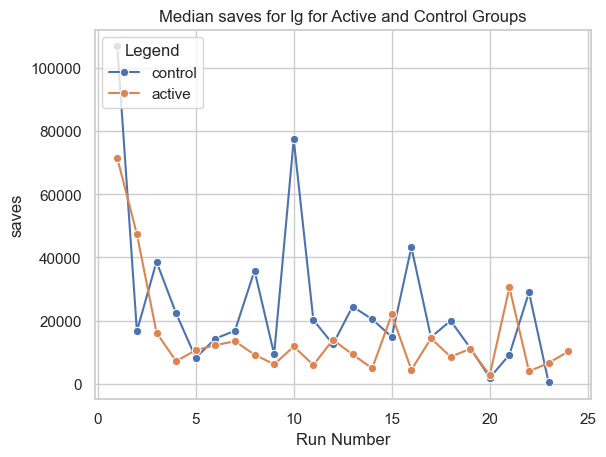

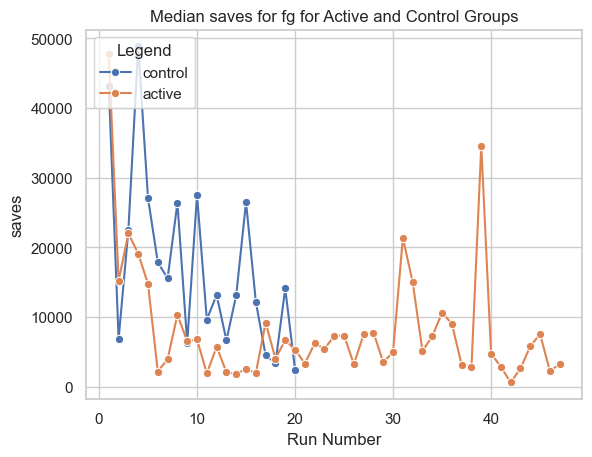

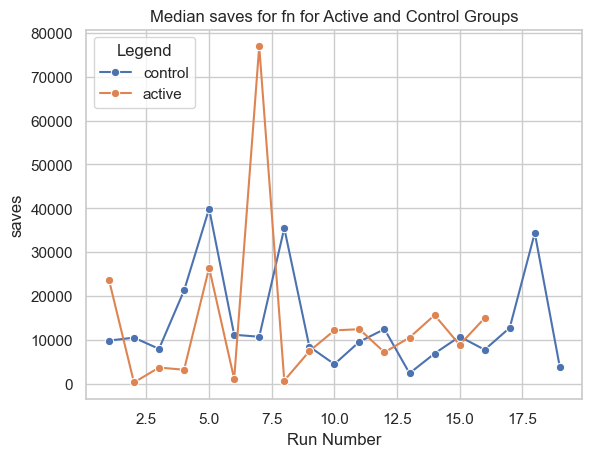

In [8]:
dfs = [ep, ss, dl, lg, fg, fn]
initials = ['ep', 'ss', 'dl', 'lg', 'fg', 'fn']
metrics = ["likes", "comments", "shares", "saves"]

for metric in metrics:
    for i in range(len(dfs)):
        plot_metric_member(metric, initials[i], dfs[i])

## **countAllHashtags**

Takes a string or a NaN value. Splits the strings to find hashtags, updates a Counter object (*a global variable*) to keep track of all hashtags.

##### The following code collects frequency for all hashtags.

In [9]:
cnt = Counter()
def countAllHashtags(cell):
    """
    Takes a string or a NaN value. Splits the srings to find hashtags, updates a Counter object
    (a global variable) to keep track of all hashtags.
    """
    if type(cell) == str: # avoid NaN values, which are float
        htList = [el.strip() for el in cell.split(',')] # prepare individual hashtags
        cnt.update(htList) # method update of Counter takes a list and updates all keys
        
_ = df['hashtags'].apply(countAllHashtags)
all_hashtagfreq = cnt.most_common(25)
all_hashtagfreq

[("'fyp'", 1173),
 ("['fyp'", 987),
 ("'viral'", 768),
 ("'foryou'", 704),
 ("'fyp%E3%82%B7'", 453),
 ("'foryoupage'", 380),
 ("'fyp']", 367),
 ("'funny'", 294),
 ("'trending'", 272),
 ("'fyp%E3%82%B7%E3%82%9Aviral'", 226),
 ("'relatable'", 174),
 ("['foryou'", 174),
 ("'viralvideo'", 163),
 ("'viral']", 162),
 ("['fyp%E3%82%B7'", 161),
 ("'tiktok'", 158),
 ("['fyp']", 156),
 ("'couple'", 140),
 ("'foryou']", 137),
 ("'fy'", 123),
 ("'trend'", 117),
 ("'dance'", 99),
 ("'foryoupage']", 97),
 ("['viral'", 96),
 ("'blowthisup'", 94)]

##### The following code collects frequency for all hashtags shown in **control** accounts.

In [10]:
control = pd.concat([ep_cntrl,ss_cntrl,fg_cntrl,lg_cntrl,dl_cntrl])
controlCnt = Counter()
def countAllHashtags(cell):
    """
    Takes a string or a NaN value. Splits the srings to find hashtags, updates a Counter object
    (a global variable) to keep track of all hashtags.
    """
    if type(cell) == str: # avoid NaN values, which are float
        htList = [el.strip() for el in cell.split(',')] # prepare individual hashtags
        controlCnt.update(htList) # method update of Counter takes a list and updates all keys
        
_ = control['hashtags'].apply(countAllHashtags)
control_hashtagfreq = controlCnt.most_common(25)
control_hashtagfreq

[("'fyp'", 317),
 ("['fyp'", 240),
 ("'viral'", 213),
 ("'foryou'", 183),
 ("'fyp%E3%82%B7'", 142),
 ("'foryoupage'", 125),
 ("'fyp']", 93),
 ("'funny'", 82),
 ("'trending'", 70),
 ("'fyp%E3%82%B7%E3%82%9Aviral'", 67),
 ("'viralvideo'", 60),
 ("['foryou'", 43),
 ("'tiktok'", 43),
 ("'fy'", 43),
 ("'viral']", 38),
 ("['fyp%E3%82%B7'", 38),
 ("'fypage'", 36),
 ("'foryou']", 33),
 ("'therian'", 31),
 ("'fyppppppppppppppppppppppp'", 31),
 ("'relatable'", 31),
 ("'couple'", 31),
 ("'therianthropy'", 28),
 ("['viral'", 28),
 ("['fyp']", 28)]

##### The following code collects frequency for all hashtags shown in **active** accounts.

In [11]:
active = pd.concat([ep_activ,ss_activ,fg_activ,lg_activ,dl_activ])
activeCnt = Counter()
def countAllHashtags(cell):
    """
    Takes a string or a NaN value. Splits the srings to find hashtags, updates a Counter object
    (a global variable) to keep track of all hashtags.
    """
    if type(cell) == str: # avoid NaN values, which are float
        htList = [el.strip() for el in cell.split(',')] # prepare individual hashtags
        activeCnt.update(htList) # method update of Counter takes a list and updates all keys
        
_ = active['hashtags'].apply(countAllHashtags)
active_hashtagfreq = activeCnt.most_common(25)
active_hashtagfreq

[("'fyp'", 755),
 ("['fyp'", 665),
 ("'viral'", 509),
 ("'foryou'", 484),
 ("'fyp%E3%82%B7'", 289),
 ("'fyp']", 239),
 ("'foryoupage'", 236),
 ("'funny'", 193),
 ("'trending'", 184),
 ("'fyp%E3%82%B7%E3%82%9Aviral'", 142),
 ("'relatable'", 129),
 ("['foryou'", 120),
 ("['fyp']", 112),
 ("'tiktok'", 108),
 ("['fyp%E3%82%B7'", 107),
 ("'viral']", 107),
 ("'foryou']", 96),
 ("'viralvideo'", 94),
 ("'trend'", 91),
 ("'couple'", 91),
 ("'dance'", 73),
 ("'fy'", 71),
 ("'blowthisup'", 70),
 ("'foryoupage']", 67),
 ("'couplegoals'", 66)]

##### Cleaning the hashtag list and turning it into a dataframe.

In [12]:
delete = ['fyp', 'foryou', 'fy', 'fypage', 'foryoupage', 'viral','trending','tiktok']
def clean_hashtag(hashfreq):
    """
    Clean the hashtag list and turn it into a dataframe
    """
    hashtags = []
    freqs = []
    for hashtag, freq in hashfreq:
        #change the hashtag into readable format
        if '%' in hashtag:
            hashtag = urllib.parse.unquote(hashtag)
        #reformat the hashtags
        hashtag = hashtag.replace("'","")
        hashtag = hashtag.replace("[","")
        hashtag = hashtag.replace("]","")
        #check if we want the hashtag
        if (hashtag not in delete) and ('fyp' not in hashtag):
            hashtags.append(hashtag)
            freqs.append(freq)
    #generate dataframe
    df = pd.DataFrame()
    df["hashtag"] = hashtags
    df["freq"] = freqs
    return df

##### Creating a bargraph representation of frequency.

In [13]:
def get_hashfreq_bar(df, group):
  """
  Takes in a dataframe as an input and generate a bar graph 
  """
  plt.bar(df["hashtag"],df["freq"], color ='lightseagreen', width = 0.4)

  plt.xlabel("Hashtags")
  plt.ylabel("No. of times the hashtage appears")
  plt.title(f"Frequencies of Hashtag for {group} group")
  plt.xticks(rotation=45)

  plt.savefig(f'{cwd}/vizualizations/{group}_bargraph.png', bbox_inches='tight')
  plt.show()

##### Creating a piechart representation of frequency.

In [14]:
def get_hashfreq_pie(df, group):
    """
    Takes in a dataframe as an input and generate a pie chart 
    """
    df["percent"] = (df['freq']/df['freq'].sum())*100
    y = df["freq"]
    mylabels = df["hashtag"]

    plt.pie(y, labels = mylabels)
    plt.title(f"Frequencies of Hashtag for {group} group")

    plt.savefig(f'{cwd}/vizualizations/{group}_piechart.png', bbox_inches='tight')
    plt.show() 

##### Cleaning hashtags for **all**, **active**, and **control**.

In [15]:
df_all = clean_hashtag(all_hashtagfreq)
df_active = clean_hashtag(active_hashtagfreq)
df_control = clean_hashtag(control_hashtagfreq)

##### Creating a bargraph representation of frequency 

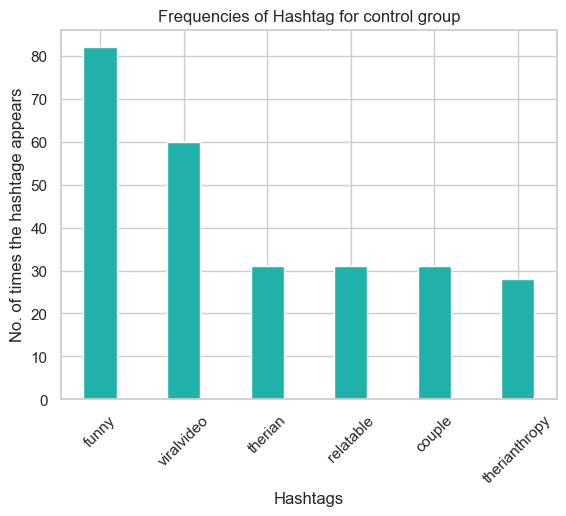

In [16]:
get_hashfreq_bar(df_control, 'control')

##### Creating a piechart representation of frequency of 

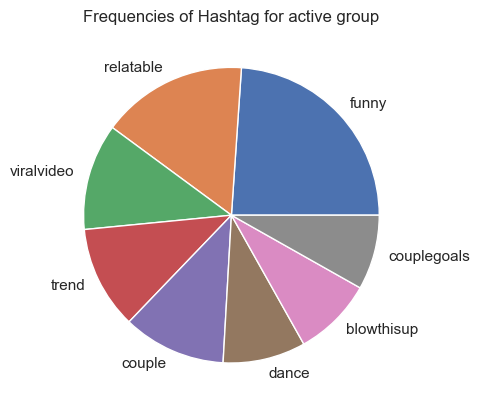

In [17]:
get_hashfreq_pie(df_active, 'active')

## **plot_differences**

Function to create differences and regression graph, plots the difference between the median control and median active metric.

##### **Parameters**:
- **initial**: *str*, the initials of one of section 1 group 2's members, either "ep", "ss", "Dl", "lg", "fg", or "fn"
- **columns_to_plot**: a *list* of the difference columns to plot in the graph:
  - Options are ['likes_log_dif',likes_dif','comments_dif','shares_dif','saves_dif']

In [18]:
def plot_differences(initial,metric_column,title,min_yaxis,max_yaxis):
    '''
    initial: the initials of one of section 1 group 2's members, either "ep", "ss", "Dl", "lg", "fg", or "fn"
    columns_to_plot: a list of the difference columns to plot in the graph:
        Options are ['likes_dif','comments_dif','shares_dif','saves_dif']
    Plots the difference between the median control and median active metric. 
    '''
    df_activ = df[df['batchID'].str.contains(f'{initial}_activ')]
    df_cntrl = df[df['batchID'].str.contains(f'{initial}_cntrl')]
    
    #get descriptive statistic for df by index
    metrics = ["likes", "comments", "shares", "saves"]
    df_activ_group = df_activ.groupby('run')[metrics].median()
    df_cntrl_group = df_cntrl.groupby('run')[metrics].median()

    # rename columns for clarity 
    activ_column_mapping = {'likes':'likes_activ','comments':'comments_activ',
                            'shares':'shares_activ','saves':'saves_activ'}
    cntrl_column_mapping = {'likes':'likes_cntrl','comments':'comments_cntrl',
                            'shares':'shares_cntrl','saves':'saves_cntrl'}
    df_activ_group.rename(columns=activ_column_mapping,inplace=True)
    df_cntrl_group.rename(columns=cntrl_column_mapping,inplace=True)

    # find the difference in means for all the metrics
    df_dif = pd.concat([df_activ_group,df_cntrl_group],axis=1)
    df_dif.dropna(inplace=True) # drop the rows with NA
    df_dif['likes_dif'] = df_dif["likes_cntrl"] - df_dif['likes_activ']
    df_dif['comments_dif'] = df_dif["comments_cntrl"] - df_dif['comments_activ']
    df_dif['shares_dif'] = df_dif["shares_cntrl"] - df_dif['shares_activ']
    df_dif['saves_dif'] = df_dif["saves_cntrl"] - df_dif['saves_activ']
    
    # Plot the differences
    plt.figure(figsize=(15, 6)) # (width,height)
    
    # Create the line plot
    plot_colors = ['lightblue','lightgreen','orange','red']
    sns.lineplot(x='run', y=metric_column,data=df_dif, 
                 linewidth = 2,color=plot_colors[0],label=f'{title} Difference')
    
    # Add the regression line
    reg_colors = ['blue','darkgreen','darkorange','darkred']
    sns.regplot(x=df_dif.index, y=metric_column,data=df_dif,ci=None,
                color=reg_colors[0],line_kws={'linewidth':3},label=f'{title} Regression')
        
    # Edit Graph
    plt.title(f'Difference in Median {title} by Run for {initial} Data')
    plt.axis([1,len(df_dif),min_yaxis,max_yaxis])
    plt.xlabel('Runs')
    plt.xticks(df_dif.index)
    plt.ylabel('Difference (control - active)')
    plt.legend()
    
    plt.savefig(f'{cwd}/{initial}_{title}_differences.png', bbox_inches='tight')
    plt.show()

    return df_dif

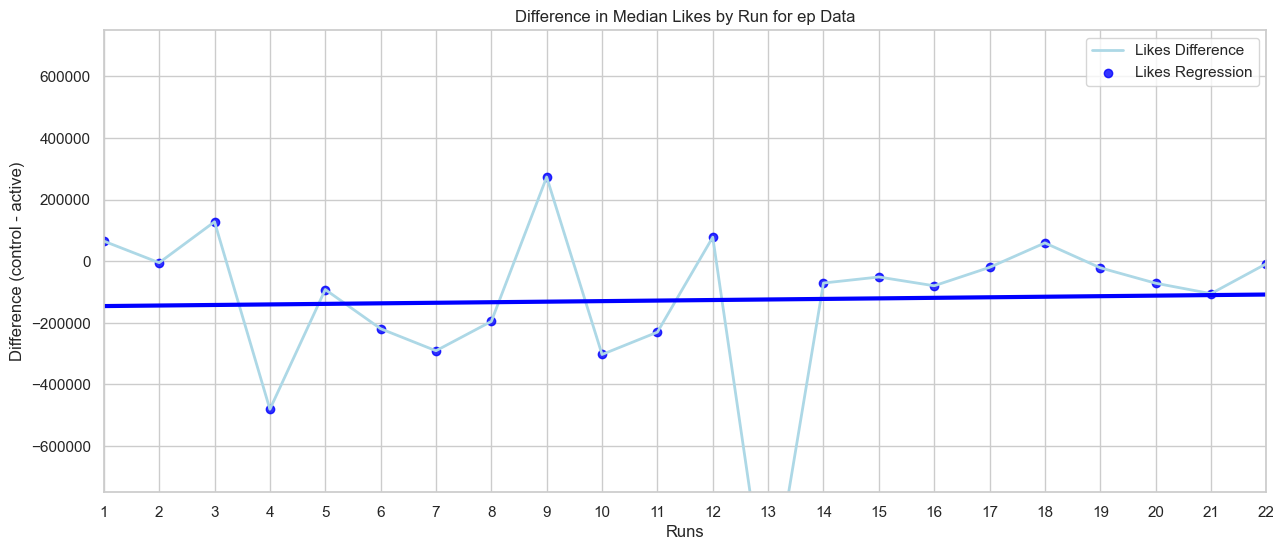

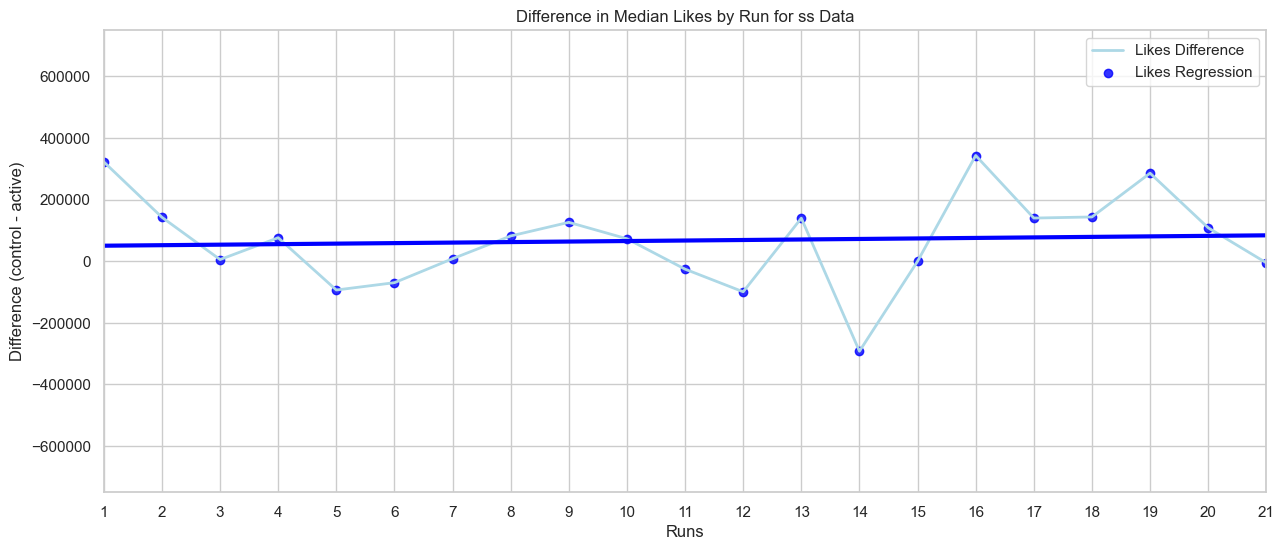

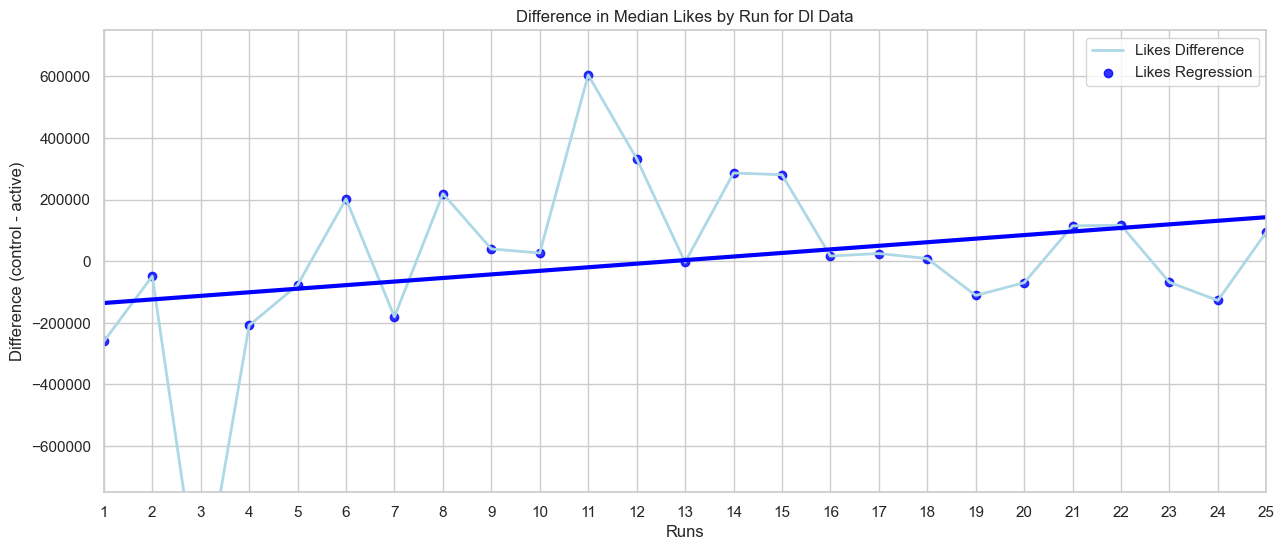

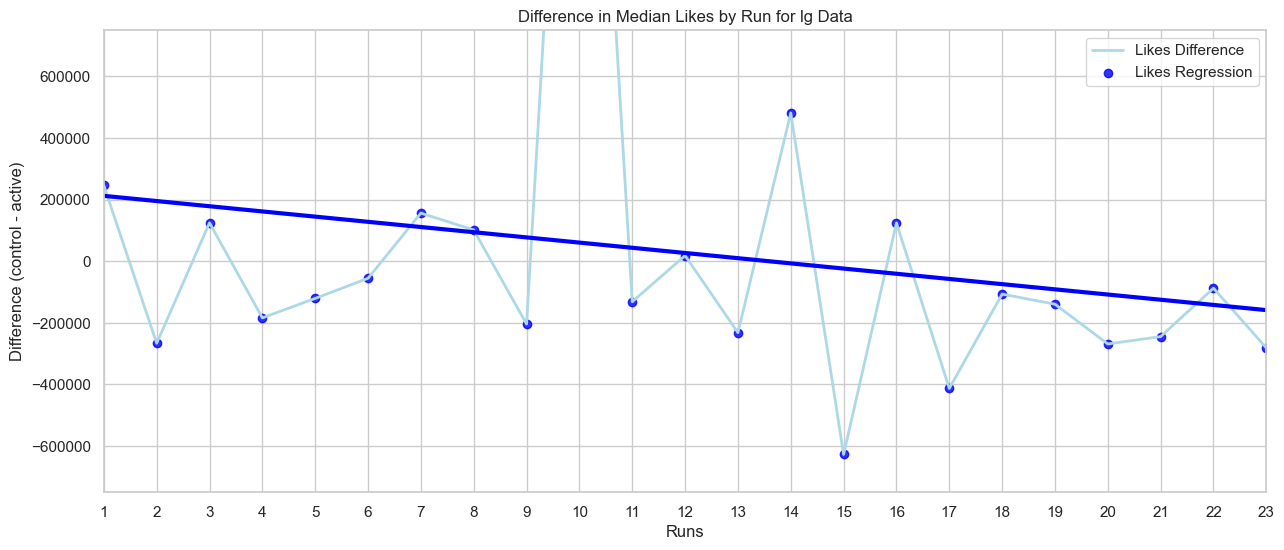

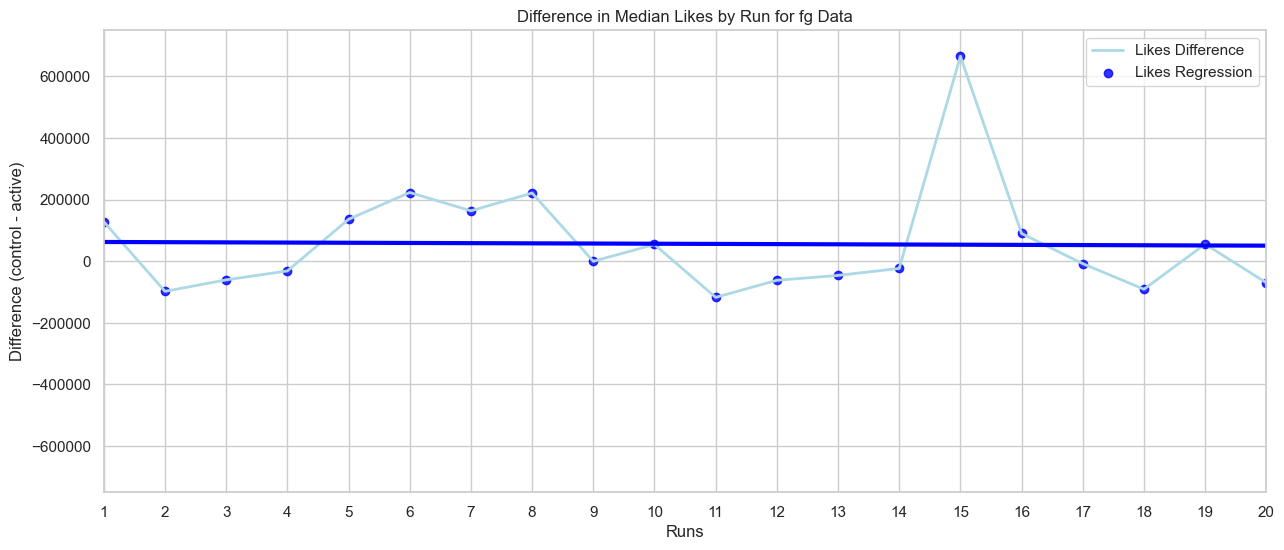

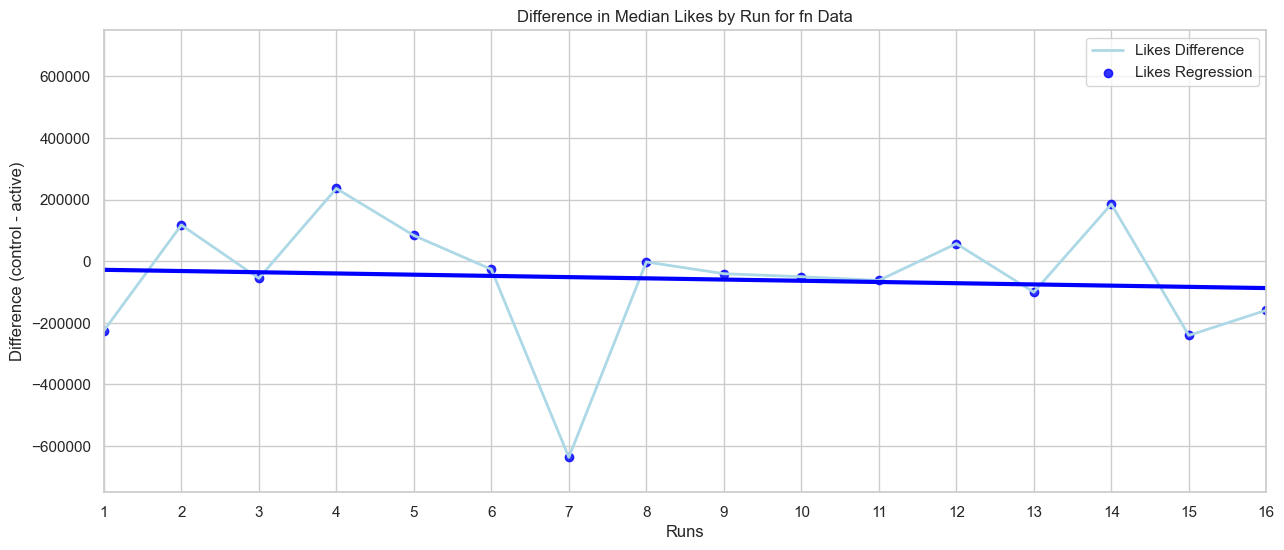

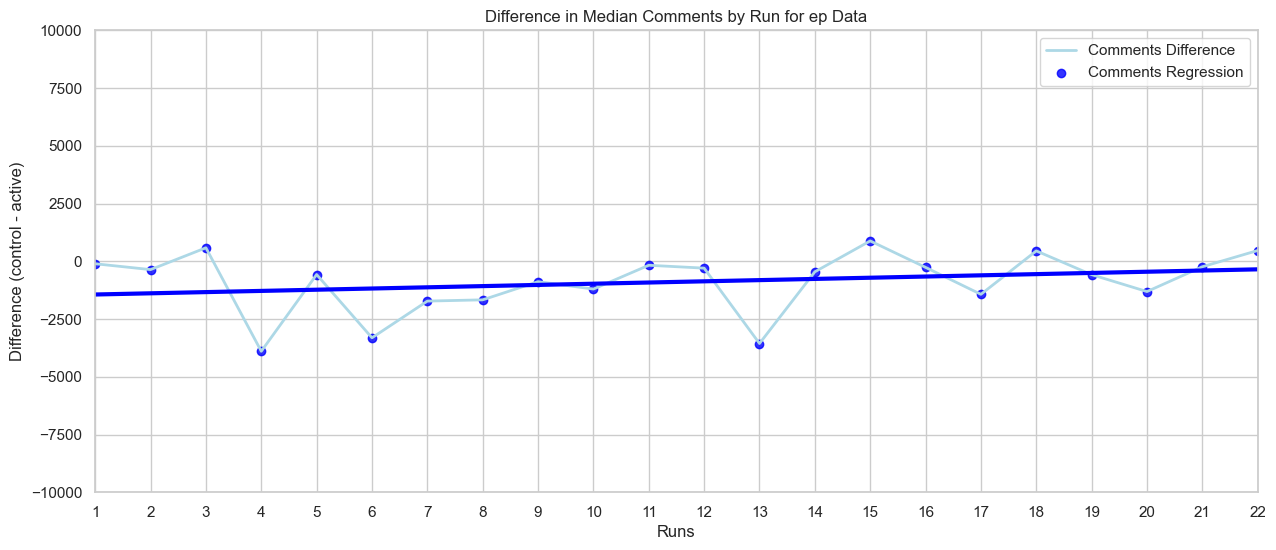

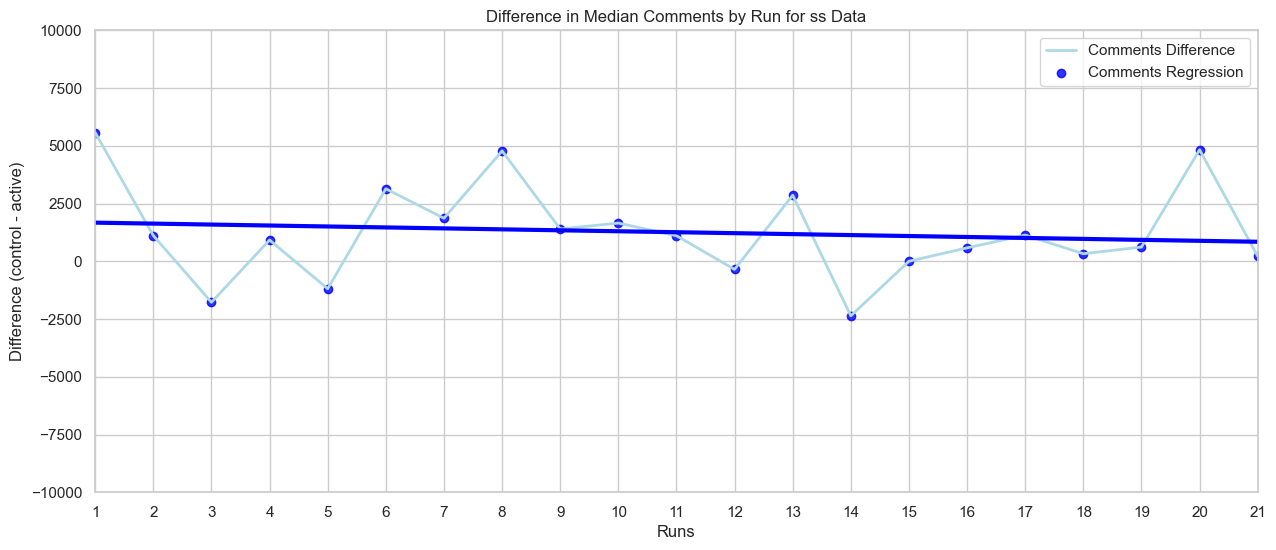

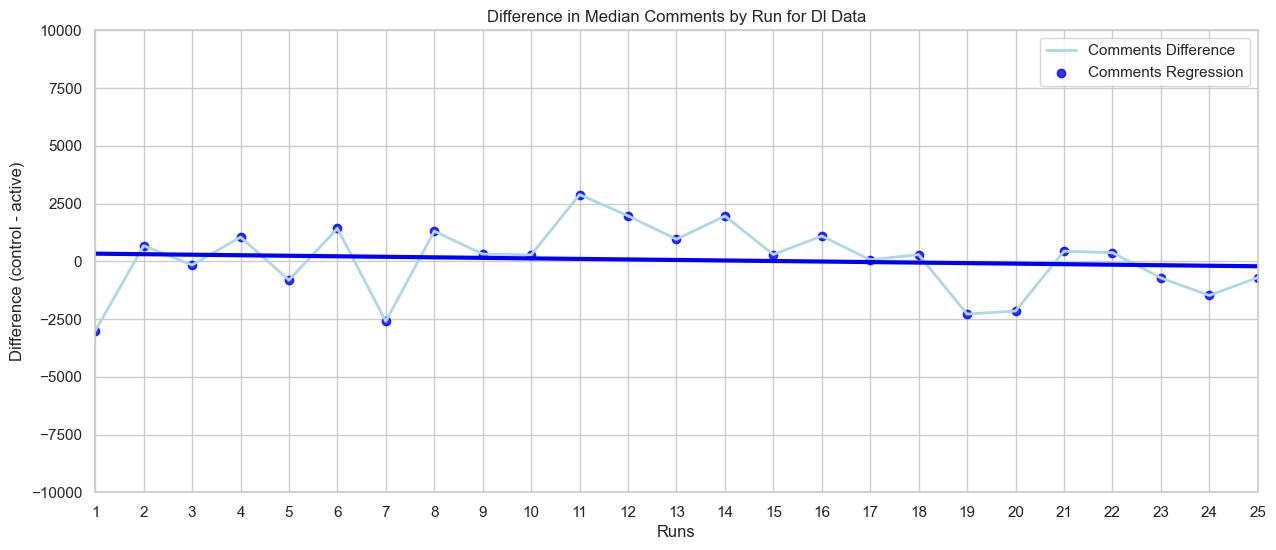

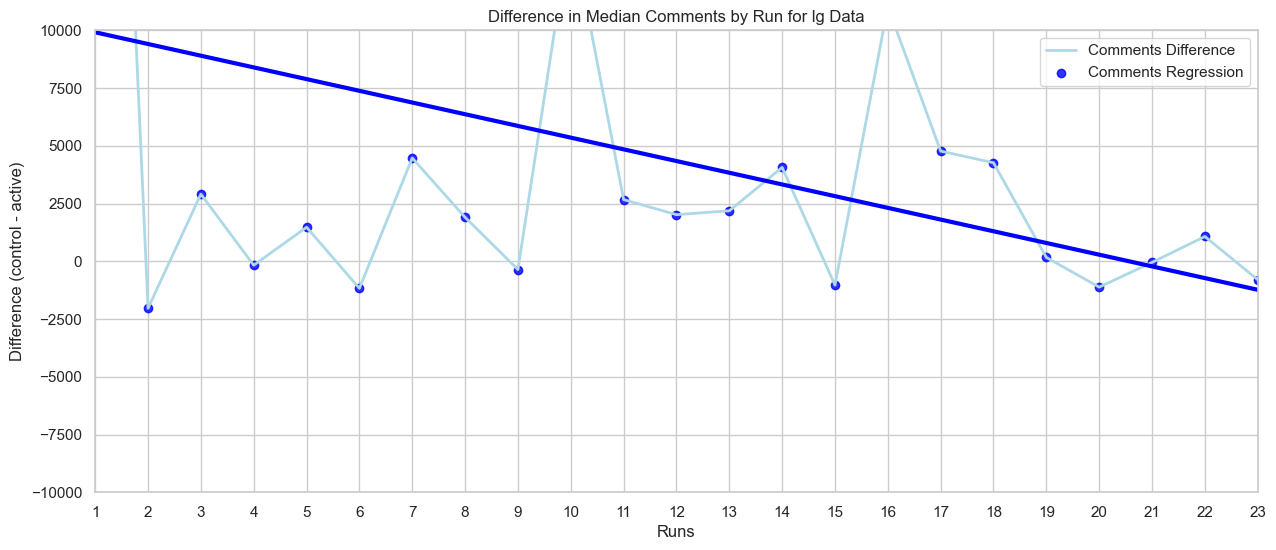

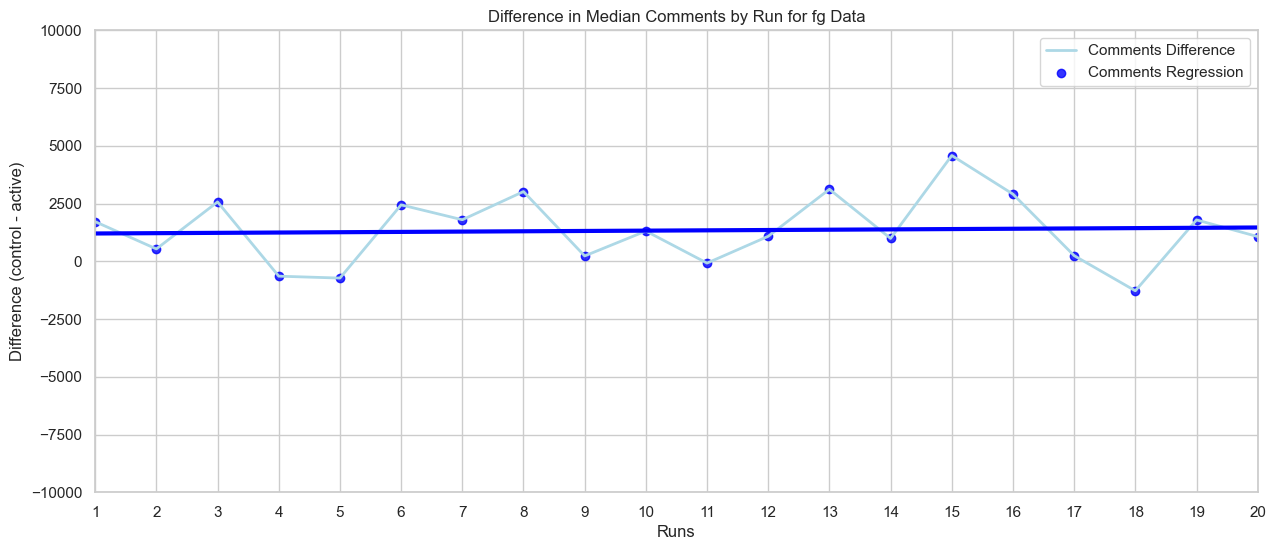

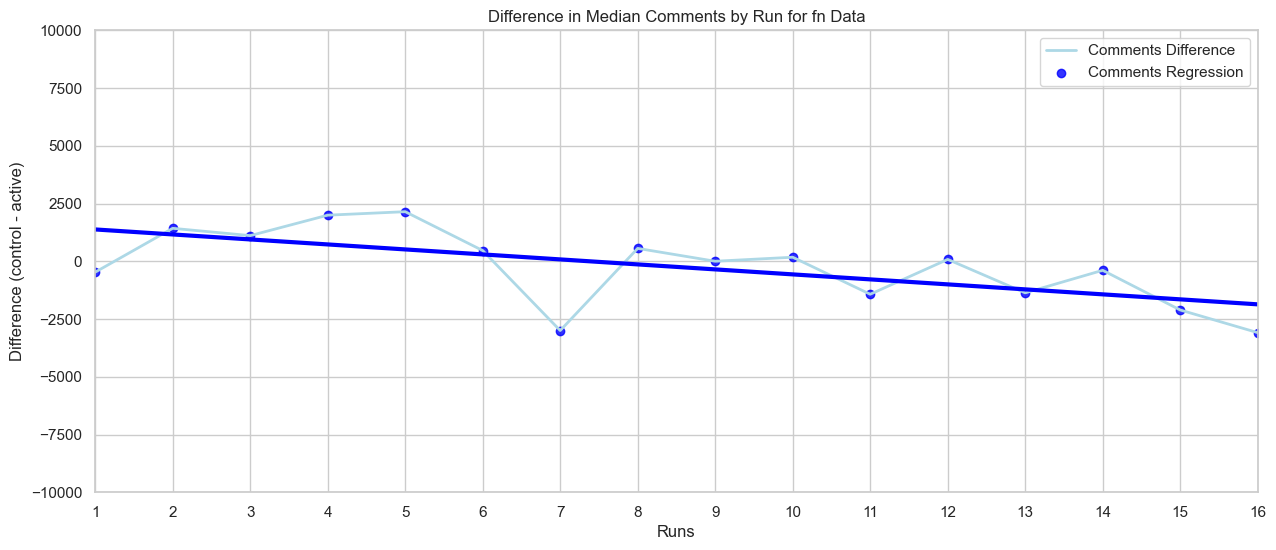

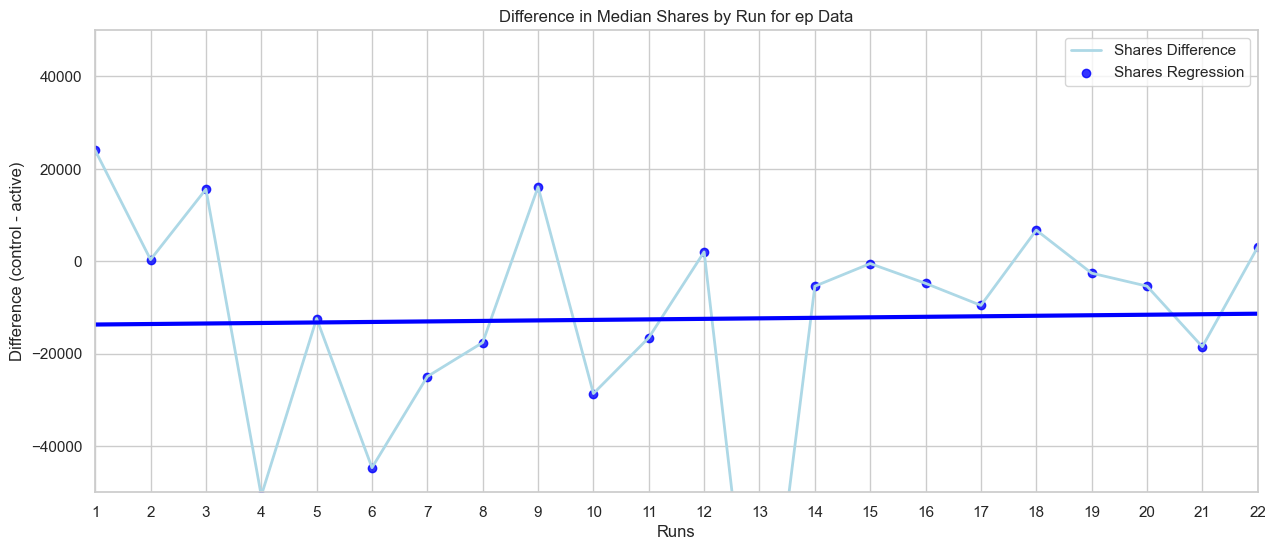

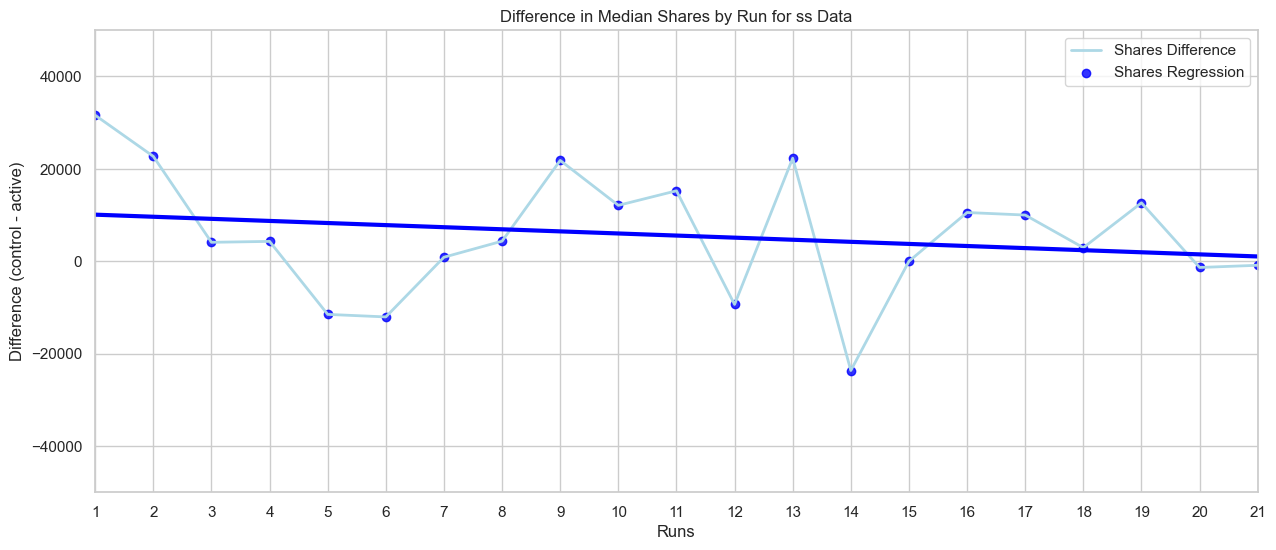

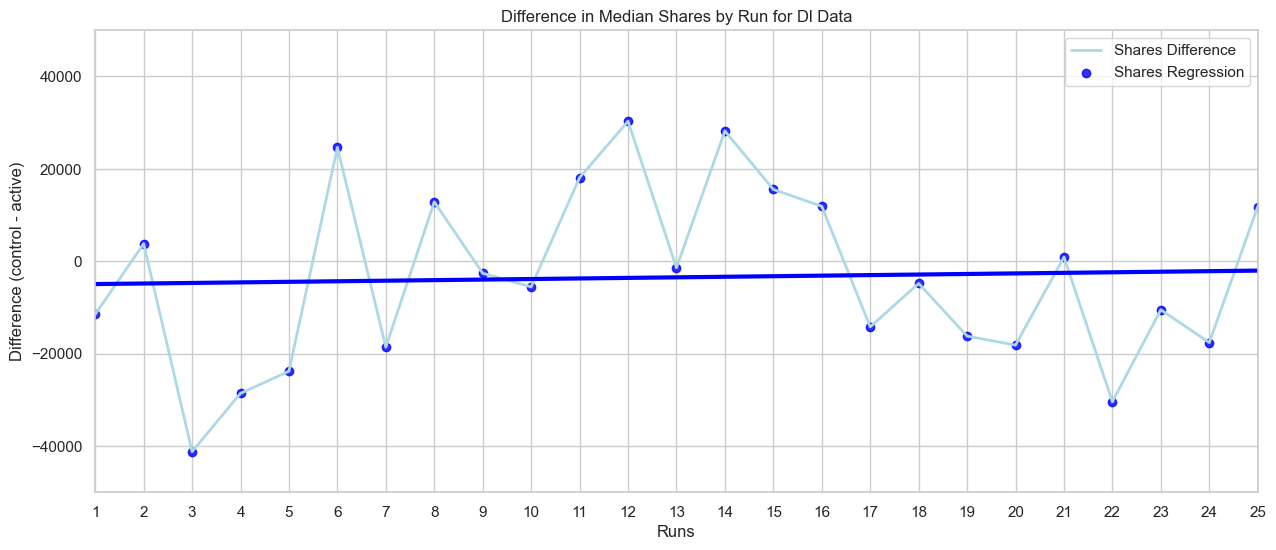

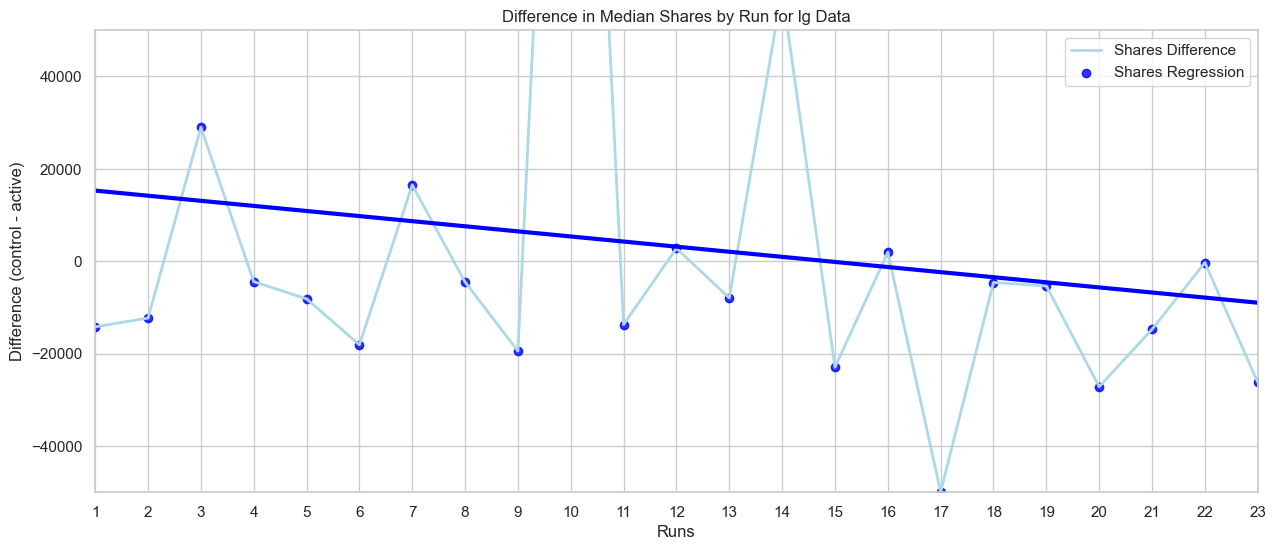

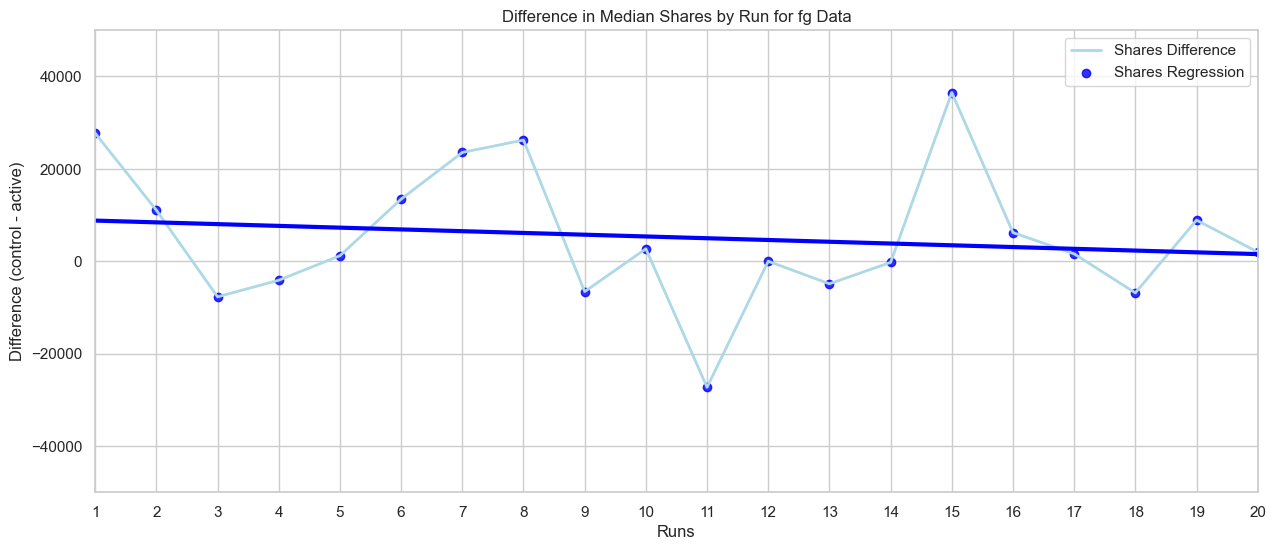

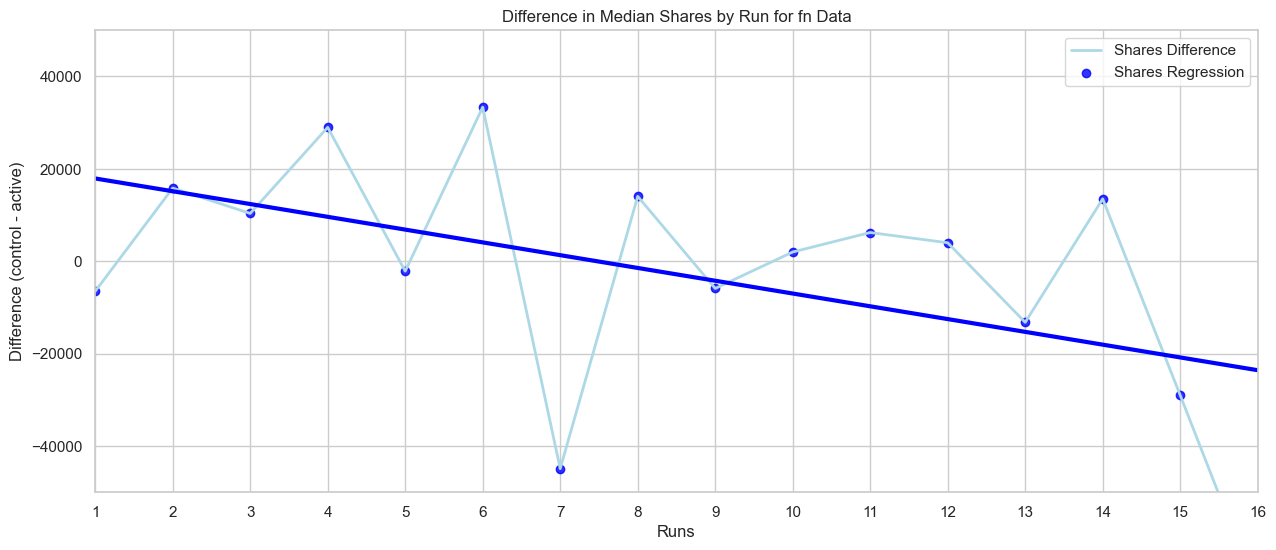

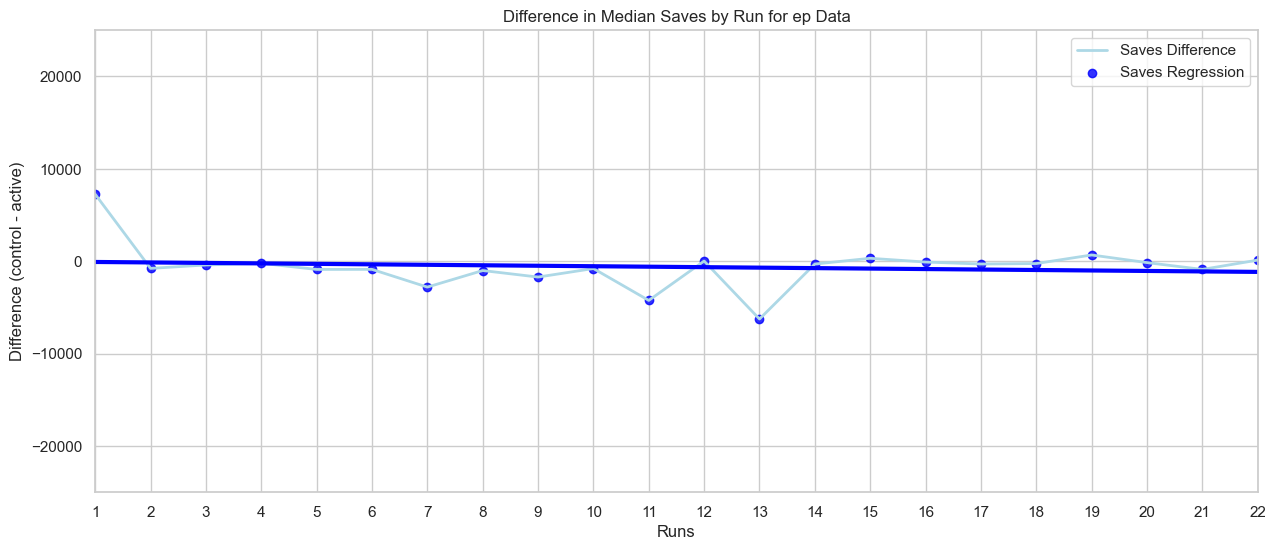

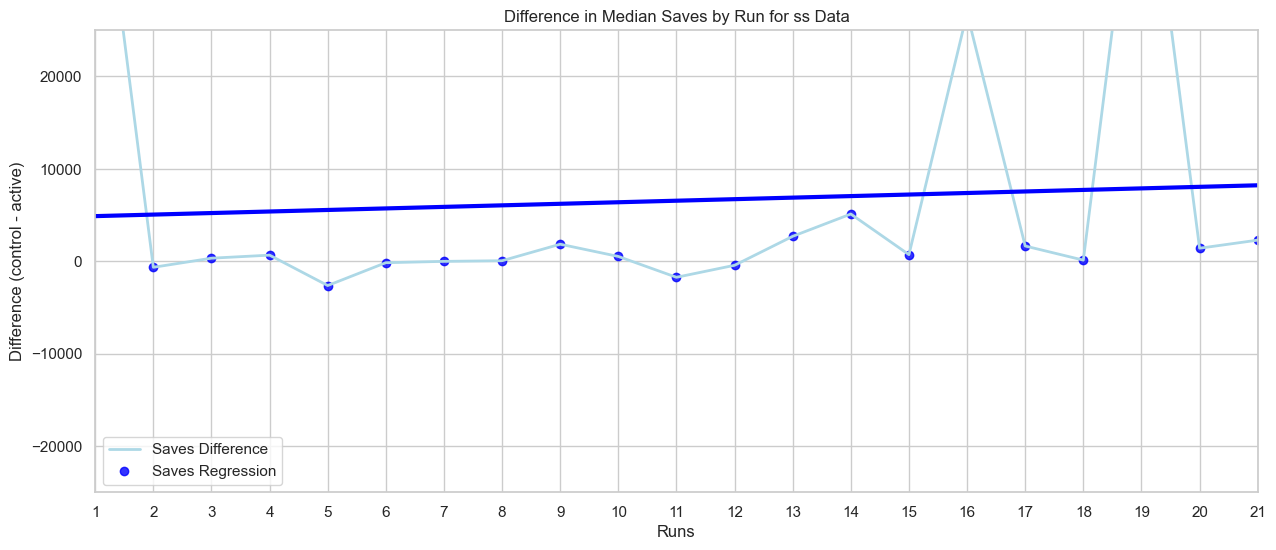

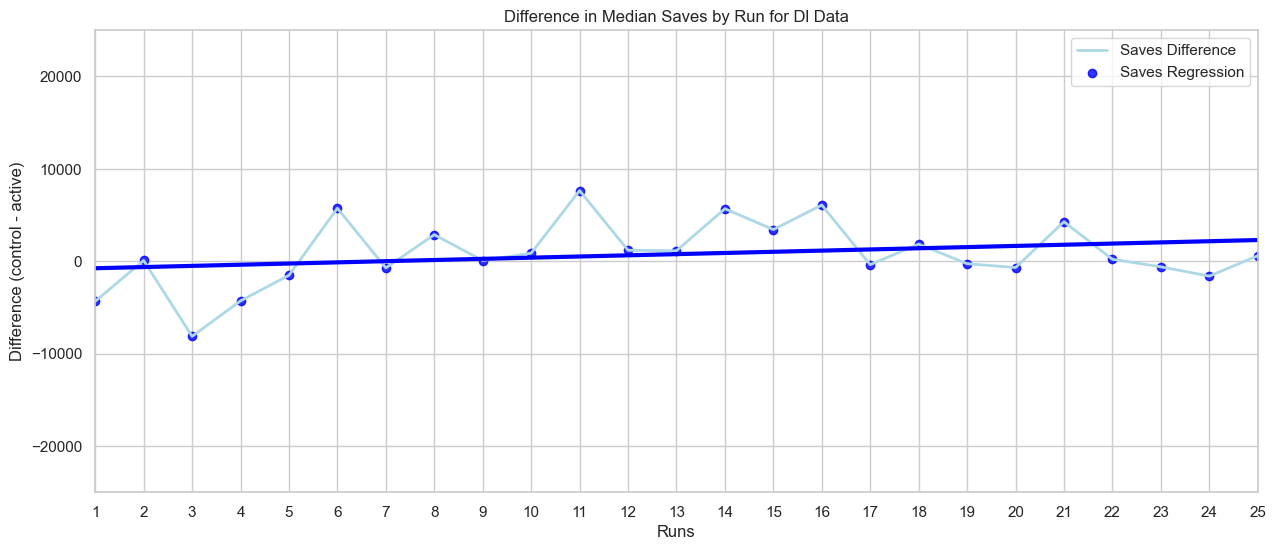

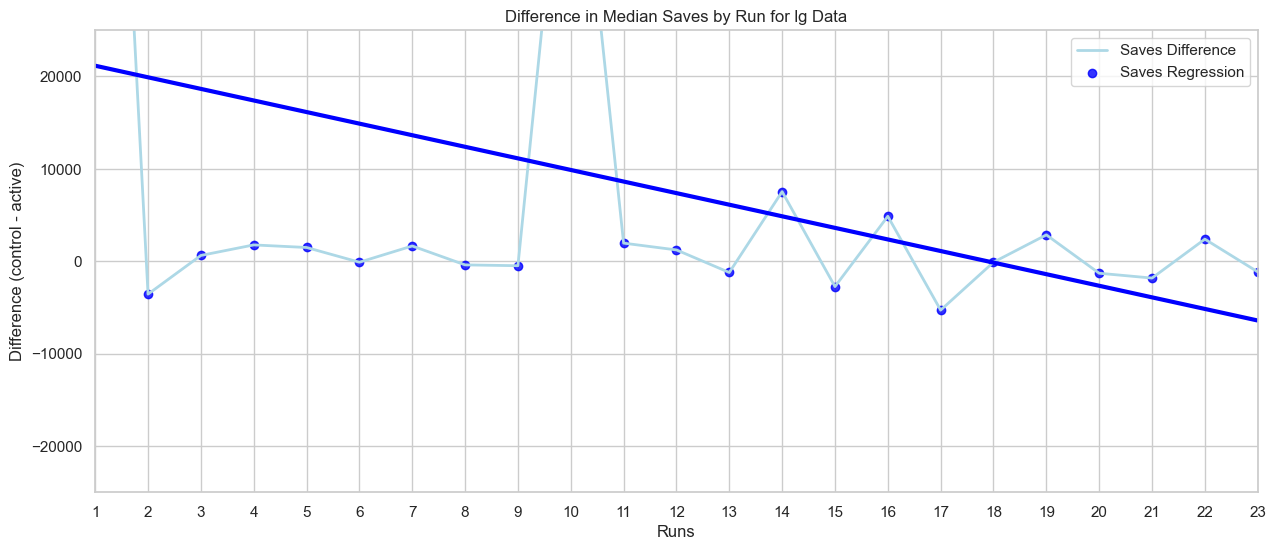

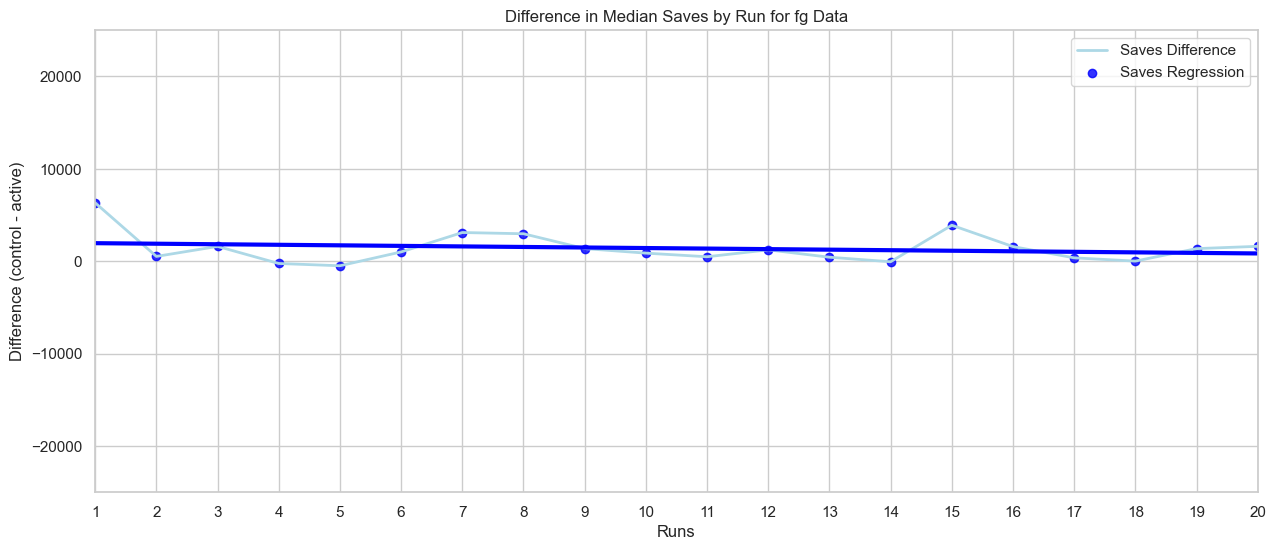

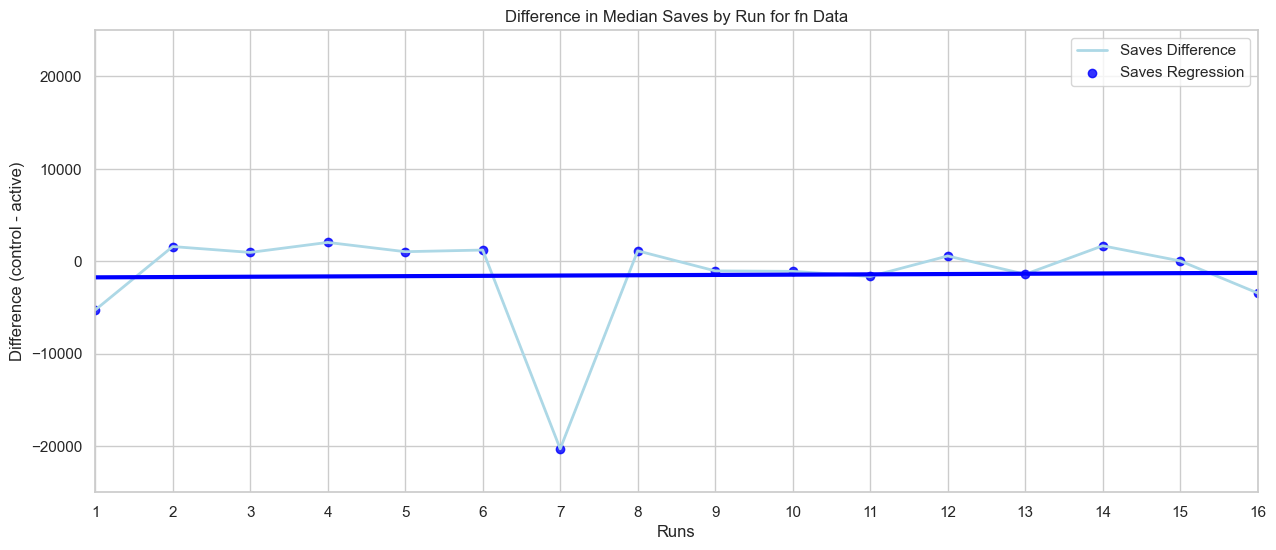

In [19]:
members = ["ep", "ss", "Dl", "lg", "fg", "fn"]
features = ['likes_dif','comments_dif','shares_dif','saves_dif']

for member in members:
    plot_differences(member,'likes_dif','Likes',-750000,750000)
    
for member in members:
    plot_differences(member,'comments_dif','Comments',-10000,10000)
    
for member in members:
    plot_differences(member,'shares_dif','Shares',-50000,50000) 
    
for member in members:
    plot_differences(member,'saves_dif','Saves',-25000,25000) 

## **jaccard_similarity**

Takes in two lists from the active and control dataframes and calculates their similarities.
Adds a new column to the main dataframe:
- **postID**: *string* unique identifier of a post

In [20]:
def createPostID(row):
    return f"{row['author']}_{row['saves']}"

df['postID'] = df.apply(createPostID, axis=1)
df.head()

batchID  run  batch  index  saved         author    likes  comments  \
0  fn_activ_1_1_0    1      1      0  False  ina.katherine  3400000     30200   
1  fn_activ_1_1_1    1      1      1  False       leci.bby   280200       627   
2  fn_activ_1_1_2    1      1      2  False  kassieemariee   689400      2198   
3  fn_activ_1_1_3    1      1      3  False  caseynicolaxx    29500       107   
4  fn_activ_1_1_4    1      1      4  False   jailyneojeda   439800      1313   

   shares  saves                                          music  \
0  226400  94800                           original sound - ina   
1   15500    164                   original sound - fr0sty_rick   
2   73600   6060                     original sound - Taj.Mahal   
3     855     62  Rock With It by Saucy Santana - Saucy Santana   
4   30800    965                 original sound - Jailyne Ojeda   

                                            hashtags   group  \
0                                                NaN  active   
1  ['fyp%E3%82%B7', 'relatable', 'trending', 'ayl...  active   
2                                                NaN  active   
3  ['fyp', 'foryou', 'foryoupage', 'caseynicola',...  active   
4                                                NaN  active   

                postID  
0  ina.katherine_94800  
1         leci.bby_164  
2   kassieemariee_6060  
3     caseynicolaxx_62  
4     jailyneojeda_965

In [21]:
# For each run, create a separate dataframe
run_1 = df[df['run'].isin([1,2,3,4,5])]
run_2 = df[df['run'].isin([6,7,8,9,10])]
run_3 = df[df['run'].isin([11,12,13,14,15])]
run_4 = df[df['run'].isin([16,17,18,19,20])]
run_5 = df[df['run'].isin([21,22,23,24,25])]

In [22]:
def jaccard_similarity(list1, list2):
    """
    Takes in two lists and calculates their similarities
    """
    intersection = len(list(set(list1).intersection(list2)))
    union = len(set(list1).union(list2))
    if union == 0:
        return ('error')
    return round(float((intersection) / union), 3)

##### Jaccard similarity of content creators. Running for each member.

In [23]:
def jaccard_by_metric(df):
    """
    Takes in the dataframe and calculates their jaccard similarities per scenario and metric
    """
    members = ["ep", "ss", "Dl", "lg", "fg", "fn"]
    metrics = ["author", "postID", "music"]

    new_dict = {}
    
    for metric in metrics:
        new_dict[metric] = {}
        for member in members:
            #get the jaccard index for each scenario
            df_activ = df[df['batchID'].str.contains(f'{member}_activ')]
            df_cntrl = df[df['batchID'].str.contains(f'{member}_cntrl')]

            df_activ_metric = df_activ[metric]
            df_control_metric = df_cntrl[metric]
            jaccard = jaccard_similarity(list(df_activ_metric), list(df_control_metric))
            new_dict[metric][member] = jaccard

    return new_dict

In [24]:
jaccard_by_run = {}
jaccard_by_run['run1'] = jaccard_by_metric(run_1)
jaccard_by_run['run2'] = jaccard_by_metric(run_2)
jaccard_by_run['run3'] = jaccard_by_metric(run_3)
jaccard_by_run['run4'] = jaccard_by_metric(run_4)
jaccard_by_run['run5'] = jaccard_by_metric(run_5)

In [25]:
#combines all the indices into one dataframe
jaccard_df = pd.DataFrame.from_dict({(i,j): jaccard_by_run[i][j] for i in jaccard_by_run.keys() for j in jaccard_by_run[i].keys()},
                       orient='index')
jaccard_df

ep     ss     Dl     lg     fg     fn
run1 author  0.122  0.339  0.011  0.222  0.142  0.024
     postID  0.081  0.323  0.000  0.138  0.095  0.011
     music   0.118  0.344  0.017  0.236  0.154  0.018
run2 author  0.073  0.301  0.059  0.086  0.065  0.013
     postID  0.044  0.287  0.017  0.048  0.024  0.006
     music   0.068  0.301  0.075  0.084  0.076   0.02
run3 author  0.032  0.284  0.060  0.030  0.041  0.022
     postID  0.015  0.269  0.023  0.014  0.017   0.01
     music   0.043  0.282  0.062  0.041  0.031  0.045
run4 author  0.038  0.225  0.025  0.046  0.049    0.0
     postID  0.022  0.208  0.000  0.021  0.009    0.0
     music   0.037  0.221  0.025  0.051  0.048    0.0
run5 author  0.039  0.036  0.034  0.029  0.000  error
     postID  0.015  0.056  0.005  0.019  0.000  error
     music   0.063  0.046  0.034  0.020  0.000  error

## **get_top_5**

Finds the top five creators that each member had on both active and control accounts.

In [30]:
def get_top_5(df):
    """
    Takes in the dataframe and generates bar charts for each scenario for both active and control bots
    """
    members = ["ep", "ss", "Dl", "lg", "fg", "fn"]

    for member in members:
        #creates dataframes for active and control bots for each scenario
        df_activ = df[df['batchID'].str.contains(f'{member}_activ')]
        df_cntrl = df[df['batchID'].str.contains(f'{member}_cntrl')]

        #gets the top 5 authors and counts for both users
        cntrl_authors = list(df_cntrl['author'])
        cntrl_author_list = Counter(cntrl_authors).most_common(5)

        control_authors = []
        control_counts = []
        for auth in cntrl_author_list:
            if str(auth[0]) != 'nan':
                control_authors.append(auth[0])
                control_counts.append(auth[1])

        activ_authors = list(df_activ['author'])
        activ_author_list = Counter(activ_authors).most_common(5)
        
        activ_authors = []
        activ_counts = []
        for auth in activ_author_list:
            if str(auth[0]) != 'nan':
                activ_authors.append(str(auth[0]))
                activ_counts.append(int(auth[1]))

        #the pie charts
        plt.figure(figsize=(8, 5))
        plt.bar(activ_authors, activ_counts, color = 'darkred', width = 0.4)
        plt.xlabel("Content Creators")
        plt.ylabel("No. of times each creator appeared")
        plt.xticks(rotation = 70)
        plt.title("Top 5 content creators in " + member + "'s active bot")
        plt.show()

        plt.figure(figsize=(8, 5))
        plt.bar(control_authors, control_counts, color = 'darkgreen', width = 0.4)
        plt.xlabel("Content Creators")
        plt.ylabel("No. of times each creator appeared")
        plt.xticks(rotation = 70)
        plt.title("Top 5 content creators in " + member + "'s control bot")
        plt.show()

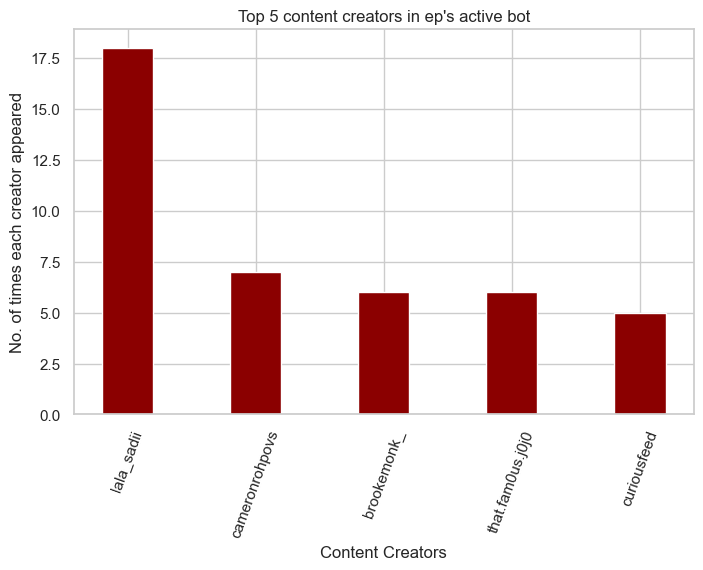

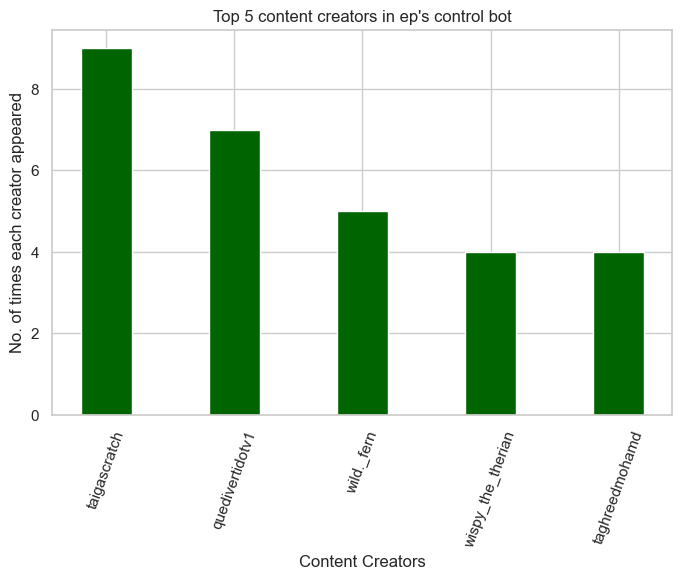

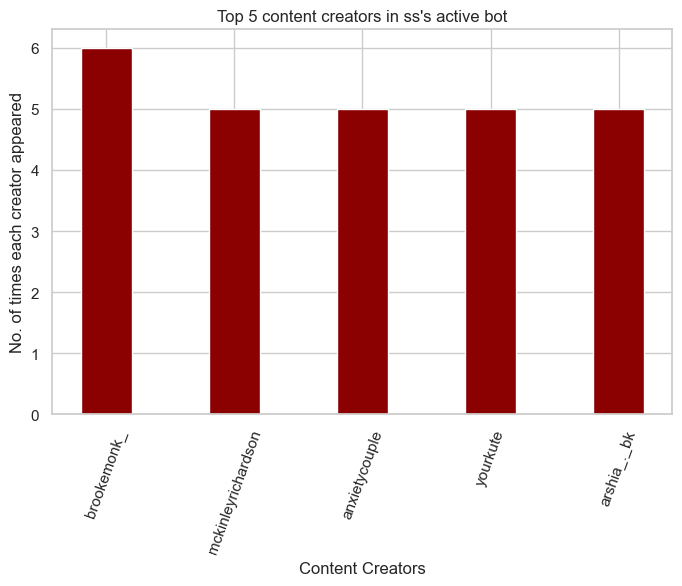

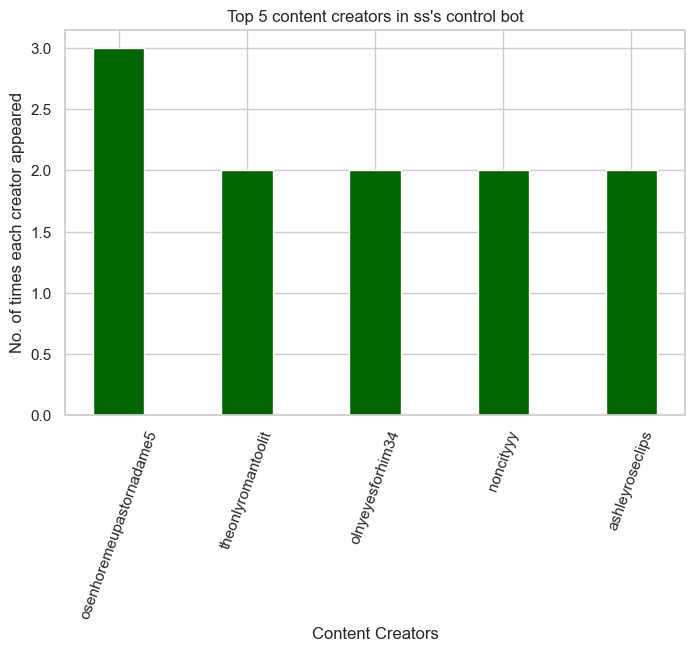

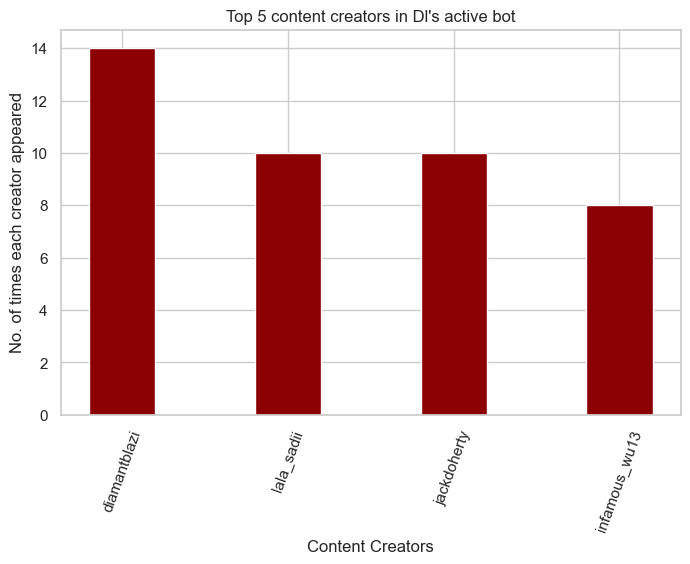

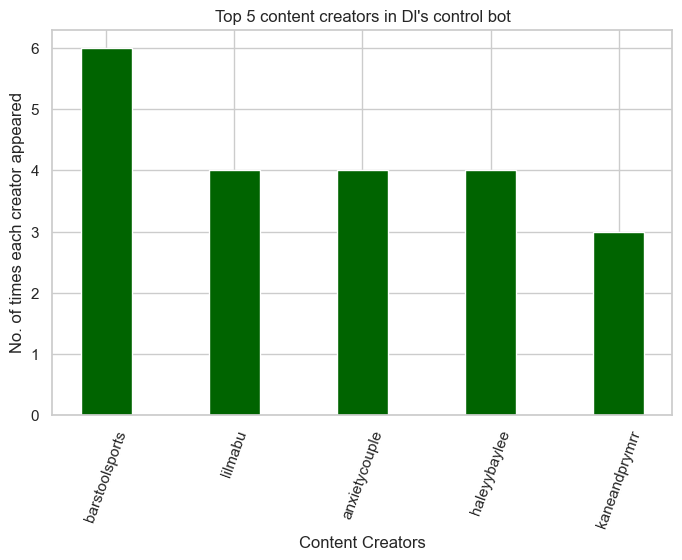

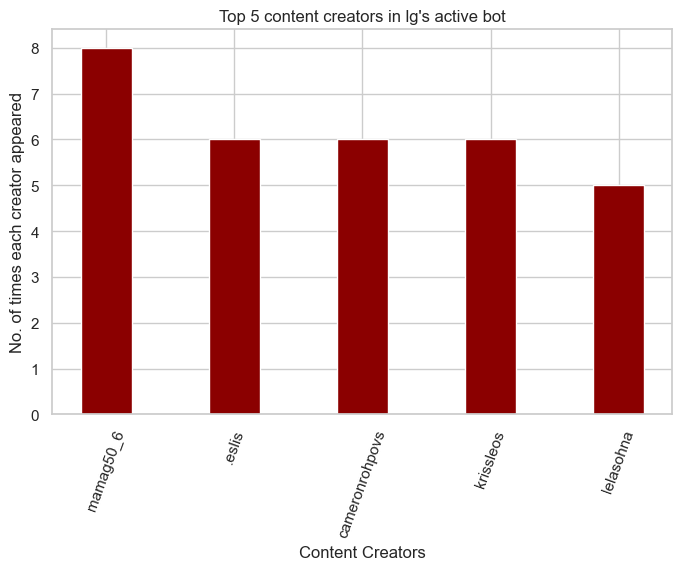

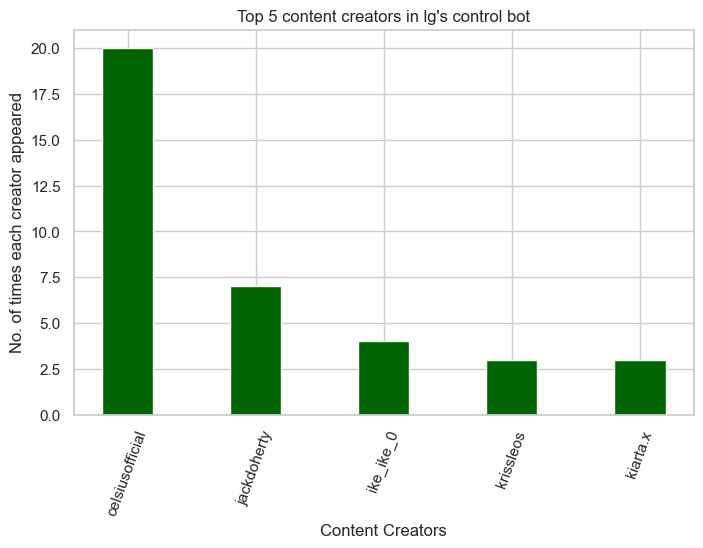

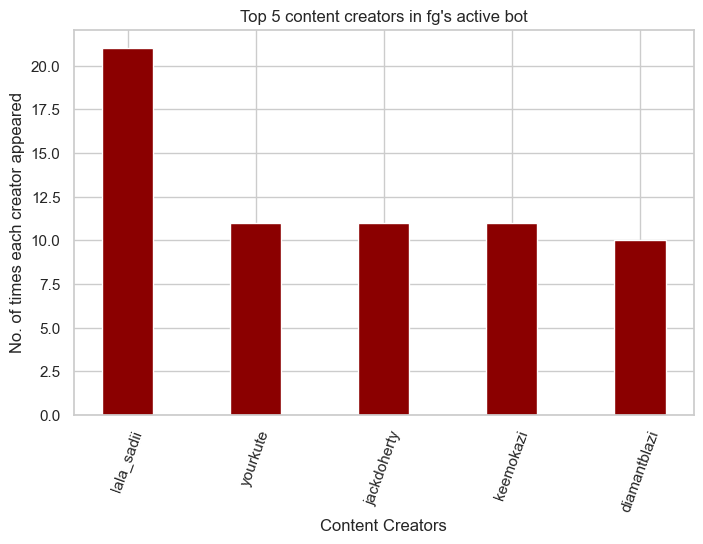

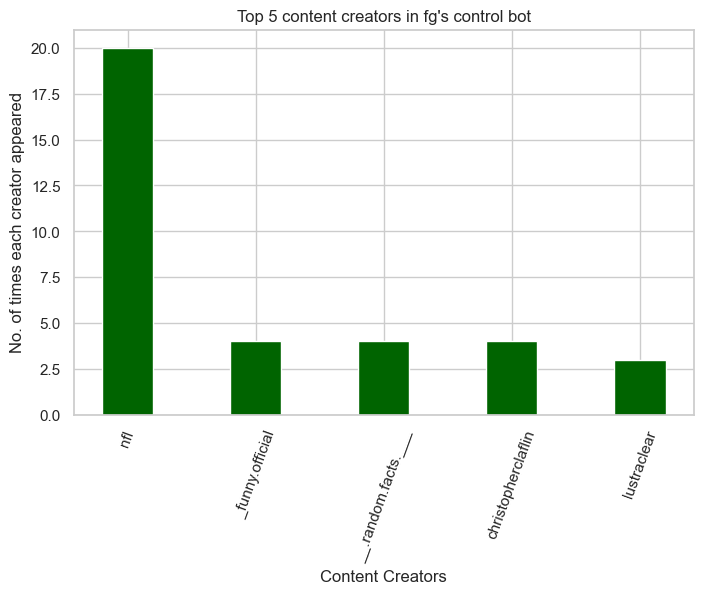

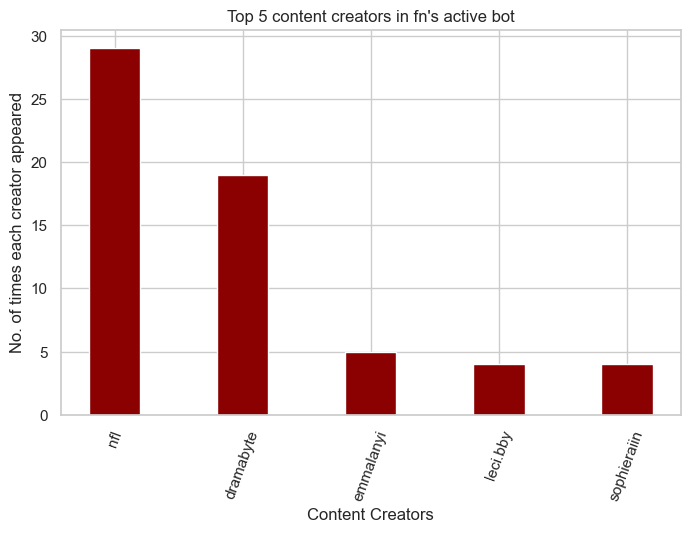

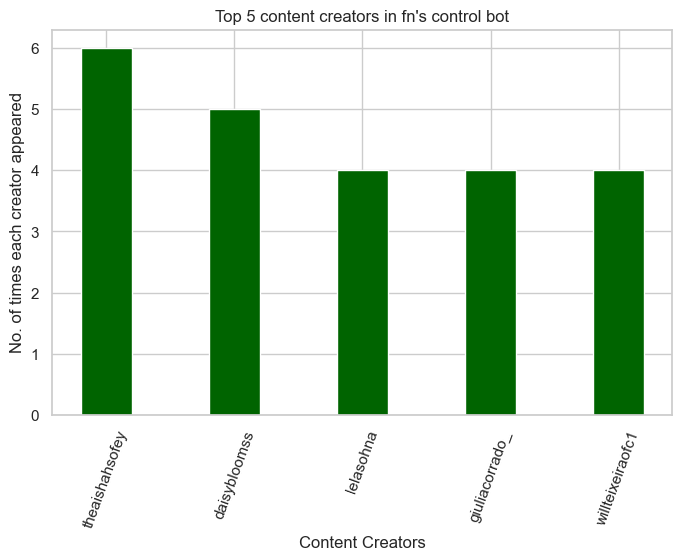

In [31]:
get_top_5(df)